#### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import librosa
%matplotlib inline

#### Importing the dataset

In [2]:
df_valid_train = pd.read_csv('cv-valid-train.csv')
df_valid_test = pd.read_csv('cv-valid-test.csv')
df_valid_dev = pd.read_csv('cv-valid-dev.csv')

df_other_train = pd.read_csv('cv-valid-train.csv')
df_other_test = pd.read_csv('cv-valid-test.csv')
df_other_dev = pd.read_csv('cv-valid-dev.csv')

df_invalid = pd.read_csv('cv-invalid.csv')

In [3]:
### Concatenating the dataframes
df = pd.concat([df_valid_train,df_valid_test,df_valid_dev,df_other_train,df_other_test,df_other_dev,df_invalid])

<AxesSubplot:>

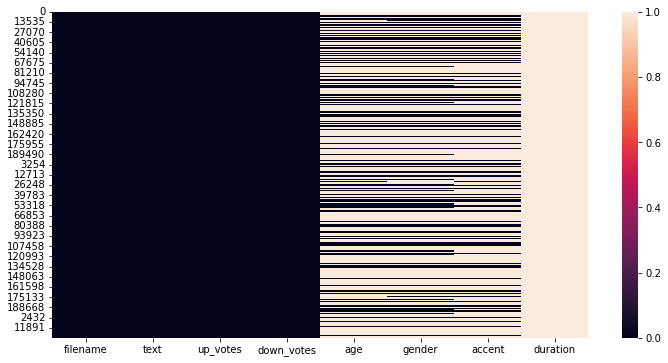

In [4]:
### Checking for the missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

In [5]:
### dropping the column because of the missing values
df = df.drop('duration',axis=1)

In [6]:
print(df.shape)
df = df.dropna()
print(df.shape)

(433097, 7)
(136525, 7)


In [7]:
df.head()

,filename,text,up_votes,down_votes,age,gender,accent
5,cv-valid-train/sample-000005.mp3,a shepherd may like to travel but he should ne...,1,0,twenties,female,us
8,cv-valid-train/sample-000008.mp3,put jackie right on the staff,3,0,seventies,male,us
13,cv-valid-train/sample-000013.mp3,but he had found a guide and didn't want to mi...,1,0,thirties,female,us
14,cv-valid-train/sample-000014.mp3,as they began to decorate the hallway a silhou...,1,0,sixties,male,england
19,cv-valid-train/sample-000019.mp3,then they got ahold of some dough and went goofy,1,0,fifties,male,australia


In [8]:
### dropping the columns
df = df.drop(['text','up_votes','down_votes'],axis=1)

In [9]:
df.head()

,filename,age,gender,accent
5,cv-valid-train/sample-000005.mp3,twenties,female,us
8,cv-valid-train/sample-000008.mp3,seventies,male,us
13,cv-valid-train/sample-000013.mp3,thirties,female,us
14,cv-valid-train/sample-000014.mp3,sixties,male,england
19,cv-valid-train/sample-000019.mp3,fifties,male,australia


In [10]:
df['gender'].value_counts()

male      99194
female    35746
other      1585
Name: gender, dtype: int64

In [13]:
### Removing the observations with other gender due to the underbalance 
index = list(df[df['gender']=='other'].index)

df = df.drop(index)
### resetting the index
df = df.reset_index()
df = df.drop('index', axis = 1)

In [19]:
### Function to change the filename according to the path
def func(fileName):
    
    fileName = fileName.replace('/','\\')
    fileName = 'C:\\Users\\Dell\\Desktop\\Audio Recognition Project\\' + fileName
    return fileName

In [20]:
df['filename'] = df['filename'].apply(lambda x:func(x))

In [21]:
df = df.drop_duplicates(subset=['filename'])

In [22]:
### moving all the files relevant to us to the same folder
def moving(fileName):
    
    source = fileName
    index_m = source.index('m')
    index_v = source.index('v')
    fileName = fileName[index_v-1:index_m-3] + '_' + fileName[index_m-2:]
    destination = 'C:\\Users\\Dell\\Desktop\\Audio Recognition Project\\Final Destination\\' + fileName
    os.rename(source,destination)

In [27]:
for i in range(len(df_invalid)):
    moving(df['filename'][i])

In [60]:
### Saving the dataset
df.to_csv('metadata.csv')

In [2]:
df = pd.read_csv('metadata.csv')

##### converting the audio files to array's

In [28]:
df.head()

,filename,age,gender,accent
0,C:\Users\Dell\Desktop\Audio Recognition Projec...,twenties,female,us
1,C:\Users\Dell\Desktop\Audio Recognition Projec...,seventies,male,us
2,C:\Users\Dell\Desktop\Audio Recognition Projec...,thirties,female,us
3,C:\Users\Dell\Desktop\Audio Recognition Projec...,sixties,male,england
4,C:\Users\Dell\Desktop\Audio Recognition Projec...,fifties,male,australia


In [29]:
### Changing the filenames to filepaths with all the files in the same folder
def filename_change(fileName):
    
    index = fileName.index('v')
    name = fileName[index-1:].replace('\\','_')[:-3] + 'wav'
    filename = 'C:\\Users\\Dell\\Desktop\\Audio Recognition Project\\Common Voice WAV\\' + name
    return filename

In [30]:
df['filename'] = df['filename'].apply(lambda x:filename_change(x))

In [35]:
df = df.reset_index()
df = df.drop('index',axis=1)

In [36]:
df.to_csv('metadata_final.csv',index=False)

#### Feature Extraction

In [4]:
df = pd.read_csv('metadata_final.csv')

In [18]:
### extract the features from the audio files using mfcc
def feature_extracter(fileName):
    audio,sample_rate = librosa.load(fileName,res_type='kaiser_fast')
    mfcc_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=30)
    mfccs_scaled_features = np.mean(mfcc_features.T, axis=0)
    
    return list(mfccs_scaled_features)

In [19]:
len(feature_extracter('C:\\Users\\Dell\\Desktop\\Audio Recognition Project\\Common Voice WAV\\cv-valid-train_sample-000005.wav'))

128

In [7]:
feature_extraction_dataset = []

In [8]:
for i in range(len(df)):
    data = feature_extracter(df['filename'][i])
    data.append(df['age'][i])
    data.append(df['gender'][i])
    data.append(df['accent'][i])
    feature_extraction_dataset.append(data)
    print("{} files completed".format(i))

0 files completed
1 files completed
2 files completed
3 files completed
4 files completed
5 files completed
6 files completed
7 files completed
8 files completed
9 files completed
10 files completed
11 files completed
12 files completed
13 files completed
14 files completed
15 files completed
16 files completed
17 files completed
18 files completed
19 files completed
20 files completed
21 files completed
22 files completed
23 files completed
24 files completed
25 files completed
26 files completed
27 files completed
28 files completed
29 files completed
30 files completed
31 files completed
32 files completed
33 files completed
34 files completed
35 files completed
36 files completed
37 files completed
38 files completed
39 files completed
40 files completed
41 files completed
42 files completed
43 files completed
44 files completed
45 files completed
46 files completed
47 files completed
48 files completed
49 files completed
50 files completed
51 files completed
52 files completed
53 

419 files completed
420 files completed
421 files completed
422 files completed
423 files completed
424 files completed
425 files completed
426 files completed
427 files completed
428 files completed
429 files completed
430 files completed
431 files completed
432 files completed
433 files completed
434 files completed
435 files completed
436 files completed
437 files completed
438 files completed
439 files completed
440 files completed
441 files completed
442 files completed
443 files completed
444 files completed
445 files completed
446 files completed
447 files completed
448 files completed
449 files completed
450 files completed
451 files completed
452 files completed
453 files completed
454 files completed
455 files completed
456 files completed
457 files completed
458 files completed
459 files completed
460 files completed
461 files completed
462 files completed
463 files completed
464 files completed
465 files completed
466 files completed
467 files completed
468 files completed


832 files completed
833 files completed
834 files completed
835 files completed
836 files completed
837 files completed
838 files completed
839 files completed
840 files completed
841 files completed
842 files completed
843 files completed
844 files completed
845 files completed
846 files completed
847 files completed
848 files completed
849 files completed
850 files completed
851 files completed
852 files completed
853 files completed
854 files completed
855 files completed
856 files completed
857 files completed
858 files completed
859 files completed
860 files completed
861 files completed
862 files completed
863 files completed
864 files completed
865 files completed
866 files completed
867 files completed
868 files completed
869 files completed
870 files completed
871 files completed
872 files completed
873 files completed
874 files completed
875 files completed
876 files completed
877 files completed
878 files completed
879 files completed
880 files completed
881 files completed


1235 files completed
1236 files completed
1237 files completed
1238 files completed
1239 files completed
1240 files completed
1241 files completed
1242 files completed
1243 files completed
1244 files completed
1245 files completed
1246 files completed
1247 files completed
1248 files completed
1249 files completed
1250 files completed
1251 files completed
1252 files completed
1253 files completed
1254 files completed
1255 files completed
1256 files completed
1257 files completed
1258 files completed
1259 files completed
1260 files completed
1261 files completed
1262 files completed
1263 files completed
1264 files completed
1265 files completed
1266 files completed
1267 files completed
1268 files completed
1269 files completed
1270 files completed
1271 files completed
1272 files completed
1273 files completed
1274 files completed
1275 files completed
1276 files completed
1277 files completed
1278 files completed
1279 files completed
1280 files completed
1281 files completed
1282 files co

1628 files completed
1629 files completed
1630 files completed
1631 files completed
1632 files completed
1633 files completed
1634 files completed
1635 files completed
1636 files completed
1637 files completed
1638 files completed
1639 files completed
1640 files completed
1641 files completed
1642 files completed
1643 files completed
1644 files completed
1645 files completed
1646 files completed
1647 files completed
1648 files completed
1649 files completed
1650 files completed
1651 files completed
1652 files completed
1653 files completed
1654 files completed
1655 files completed
1656 files completed
1657 files completed
1658 files completed
1659 files completed
1660 files completed
1661 files completed
1662 files completed
1663 files completed
1664 files completed
1665 files completed
1666 files completed
1667 files completed
1668 files completed
1669 files completed
1670 files completed
1671 files completed
1672 files completed
1673 files completed
1674 files completed
1675 files co

2020 files completed
2021 files completed
2022 files completed
2023 files completed
2024 files completed
2025 files completed
2026 files completed
2027 files completed
2028 files completed
2029 files completed
2030 files completed
2031 files completed
2032 files completed
2033 files completed
2034 files completed
2035 files completed
2036 files completed
2037 files completed
2038 files completed
2039 files completed
2040 files completed
2041 files completed
2042 files completed
2043 files completed
2044 files completed
2045 files completed
2046 files completed
2047 files completed
2048 files completed
2049 files completed
2050 files completed
2051 files completed
2052 files completed
2053 files completed
2054 files completed
2055 files completed
2056 files completed
2057 files completed
2058 files completed
2059 files completed
2060 files completed
2061 files completed
2062 files completed
2063 files completed
2064 files completed
2065 files completed
2066 files completed
2067 files co

2412 files completed
2413 files completed
2414 files completed
2415 files completed
2416 files completed
2417 files completed
2418 files completed
2419 files completed
2420 files completed
2421 files completed
2422 files completed
2423 files completed
2424 files completed
2425 files completed
2426 files completed
2427 files completed
2428 files completed
2429 files completed
2430 files completed
2431 files completed
2432 files completed
2433 files completed
2434 files completed
2435 files completed
2436 files completed
2437 files completed
2438 files completed
2439 files completed
2440 files completed
2441 files completed
2442 files completed
2443 files completed
2444 files completed
2445 files completed
2446 files completed
2447 files completed
2448 files completed
2449 files completed
2450 files completed
2451 files completed
2452 files completed
2453 files completed
2454 files completed
2455 files completed
2456 files completed
2457 files completed
2458 files completed
2459 files co

2805 files completed
2806 files completed
2807 files completed
2808 files completed
2809 files completed
2810 files completed
2811 files completed
2812 files completed
2813 files completed
2814 files completed
2815 files completed
2816 files completed
2817 files completed
2818 files completed
2819 files completed
2820 files completed
2821 files completed
2822 files completed
2823 files completed
2824 files completed
2825 files completed
2826 files completed
2827 files completed
2828 files completed
2829 files completed
2830 files completed
2831 files completed
2832 files completed
2833 files completed
2834 files completed
2835 files completed
2836 files completed
2837 files completed
2838 files completed
2839 files completed
2840 files completed
2841 files completed
2842 files completed
2843 files completed
2844 files completed
2845 files completed
2846 files completed
2847 files completed
2848 files completed
2849 files completed
2850 files completed
2851 files completed
2852 files co

3197 files completed
3198 files completed
3199 files completed
3200 files completed
3201 files completed
3202 files completed
3203 files completed
3204 files completed
3205 files completed
3206 files completed
3207 files completed
3208 files completed
3209 files completed
3210 files completed
3211 files completed
3212 files completed
3213 files completed
3214 files completed
3215 files completed
3216 files completed
3217 files completed
3218 files completed
3219 files completed
3220 files completed
3221 files completed
3222 files completed
3223 files completed
3224 files completed
3225 files completed
3226 files completed
3227 files completed
3228 files completed
3229 files completed
3230 files completed
3231 files completed
3232 files completed
3233 files completed
3234 files completed
3235 files completed
3236 files completed
3237 files completed
3238 files completed
3239 files completed
3240 files completed
3241 files completed
3242 files completed
3243 files completed
3244 files co

3589 files completed
3590 files completed
3591 files completed
3592 files completed
3593 files completed
3594 files completed
3595 files completed
3596 files completed
3597 files completed
3598 files completed
3599 files completed
3600 files completed
3601 files completed
3602 files completed
3603 files completed
3604 files completed
3605 files completed
3606 files completed
3607 files completed
3608 files completed
3609 files completed
3610 files completed
3611 files completed
3612 files completed
3613 files completed
3614 files completed
3615 files completed
3616 files completed
3617 files completed
3618 files completed
3619 files completed
3620 files completed
3621 files completed
3622 files completed
3623 files completed
3624 files completed
3625 files completed
3626 files completed
3627 files completed
3628 files completed
3629 files completed
3630 files completed
3631 files completed
3632 files completed
3633 files completed
3634 files completed
3635 files completed
3636 files co

3983 files completed
3984 files completed
3985 files completed
3986 files completed
3987 files completed
3988 files completed
3989 files completed
3990 files completed
3991 files completed
3992 files completed
3993 files completed
3994 files completed
3995 files completed
3996 files completed
3997 files completed
3998 files completed
3999 files completed
4000 files completed
4001 files completed
4002 files completed
4003 files completed
4004 files completed
4005 files completed
4006 files completed
4007 files completed
4008 files completed
4009 files completed
4010 files completed
4011 files completed
4012 files completed
4013 files completed
4014 files completed
4015 files completed
4016 files completed
4017 files completed
4018 files completed
4019 files completed
4020 files completed
4021 files completed
4022 files completed
4023 files completed
4024 files completed
4025 files completed
4026 files completed
4027 files completed
4028 files completed
4029 files completed
4030 files co

4375 files completed
4376 files completed
4377 files completed
4378 files completed
4379 files completed
4380 files completed
4381 files completed
4382 files completed
4383 files completed
4384 files completed
4385 files completed
4386 files completed
4387 files completed
4388 files completed
4389 files completed
4390 files completed
4391 files completed
4392 files completed
4393 files completed
4394 files completed
4395 files completed
4396 files completed
4397 files completed
4398 files completed
4399 files completed
4400 files completed
4401 files completed
4402 files completed
4403 files completed
4404 files completed
4405 files completed
4406 files completed
4407 files completed
4408 files completed
4409 files completed
4410 files completed
4411 files completed
4412 files completed
4413 files completed
4414 files completed
4415 files completed
4416 files completed
4417 files completed
4418 files completed
4419 files completed
4420 files completed
4421 files completed
4422 files co

4768 files completed
4769 files completed
4770 files completed
4771 files completed
4772 files completed
4773 files completed
4774 files completed
4775 files completed
4776 files completed
4777 files completed
4778 files completed
4779 files completed
4780 files completed
4781 files completed
4782 files completed
4783 files completed
4784 files completed
4785 files completed
4786 files completed
4787 files completed
4788 files completed
4789 files completed
4790 files completed
4791 files completed
4792 files completed
4793 files completed
4794 files completed
4795 files completed
4796 files completed
4797 files completed
4798 files completed
4799 files completed
4800 files completed
4801 files completed
4802 files completed
4803 files completed
4804 files completed
4805 files completed
4806 files completed
4807 files completed
4808 files completed
4809 files completed
4810 files completed
4811 files completed
4812 files completed
4813 files completed
4814 files completed
4815 files co

5161 files completed
5162 files completed
5163 files completed
5164 files completed
5165 files completed
5166 files completed
5167 files completed
5168 files completed
5169 files completed
5170 files completed
5171 files completed
5172 files completed
5173 files completed
5174 files completed
5175 files completed
5176 files completed
5177 files completed
5178 files completed
5179 files completed
5180 files completed
5181 files completed
5182 files completed
5183 files completed
5184 files completed
5185 files completed
5186 files completed
5187 files completed
5188 files completed
5189 files completed
5190 files completed
5191 files completed
5192 files completed
5193 files completed
5194 files completed
5195 files completed
5196 files completed
5197 files completed
5198 files completed
5199 files completed
5200 files completed
5201 files completed
5202 files completed
5203 files completed
5204 files completed
5205 files completed
5206 files completed
5207 files completed
5208 files co

5555 files completed
5556 files completed
5557 files completed
5558 files completed
5559 files completed
5560 files completed
5561 files completed
5562 files completed
5563 files completed
5564 files completed
5565 files completed
5566 files completed
5567 files completed
5568 files completed
5569 files completed
5570 files completed
5571 files completed
5572 files completed
5573 files completed
5574 files completed
5575 files completed
5576 files completed
5577 files completed
5578 files completed
5579 files completed
5580 files completed
5581 files completed
5582 files completed
5583 files completed
5584 files completed
5585 files completed
5586 files completed
5587 files completed
5588 files completed
5589 files completed
5590 files completed
5591 files completed
5592 files completed
5593 files completed
5594 files completed
5595 files completed
5596 files completed
5597 files completed
5598 files completed
5599 files completed
5600 files completed
5601 files completed
5602 files co

5948 files completed
5949 files completed
5950 files completed
5951 files completed
5952 files completed
5953 files completed
5954 files completed
5955 files completed
5956 files completed
5957 files completed
5958 files completed
5959 files completed
5960 files completed
5961 files completed
5962 files completed
5963 files completed
5964 files completed
5965 files completed
5966 files completed
5967 files completed
5968 files completed
5969 files completed
5970 files completed
5971 files completed
5972 files completed
5973 files completed
5974 files completed
5975 files completed
5976 files completed
5977 files completed
5978 files completed
5979 files completed
5980 files completed
5981 files completed
5982 files completed
5983 files completed
5984 files completed
5985 files completed
5986 files completed
5987 files completed
5988 files completed
5989 files completed
5990 files completed
5991 files completed
5992 files completed
5993 files completed
5994 files completed
5995 files co

6340 files completed
6341 files completed
6342 files completed
6343 files completed
6344 files completed
6345 files completed
6346 files completed
6347 files completed
6348 files completed
6349 files completed
6350 files completed
6351 files completed
6352 files completed
6353 files completed
6354 files completed
6355 files completed
6356 files completed
6357 files completed
6358 files completed
6359 files completed
6360 files completed
6361 files completed
6362 files completed
6363 files completed
6364 files completed
6365 files completed
6366 files completed
6367 files completed
6368 files completed
6369 files completed
6370 files completed
6371 files completed
6372 files completed
6373 files completed
6374 files completed
6375 files completed
6376 files completed
6377 files completed
6378 files completed
6379 files completed
6380 files completed
6381 files completed
6382 files completed
6383 files completed
6384 files completed
6385 files completed
6386 files completed
6387 files co

6735 files completed
6736 files completed
6737 files completed
6738 files completed
6739 files completed
6740 files completed
6741 files completed
6742 files completed
6743 files completed
6744 files completed
6745 files completed
6746 files completed
6747 files completed
6748 files completed
6749 files completed
6750 files completed
6751 files completed
6752 files completed
6753 files completed
6754 files completed
6755 files completed
6756 files completed
6757 files completed
6758 files completed
6759 files completed
6760 files completed
6761 files completed
6762 files completed
6763 files completed
6764 files completed
6765 files completed
6766 files completed
6767 files completed
6768 files completed
6769 files completed
6770 files completed
6771 files completed
6772 files completed
6773 files completed
6774 files completed
6775 files completed
6776 files completed
6777 files completed
6778 files completed
6779 files completed
6780 files completed
6781 files completed
6782 files co

7128 files completed
7129 files completed
7130 files completed
7131 files completed
7132 files completed
7133 files completed
7134 files completed
7135 files completed
7136 files completed
7137 files completed
7138 files completed
7139 files completed
7140 files completed
7141 files completed
7142 files completed
7143 files completed
7144 files completed
7145 files completed
7146 files completed
7147 files completed
7148 files completed
7149 files completed
7150 files completed
7151 files completed
7152 files completed
7153 files completed
7154 files completed
7155 files completed
7156 files completed
7157 files completed
7158 files completed
7159 files completed
7160 files completed
7161 files completed
7162 files completed
7163 files completed
7164 files completed
7165 files completed
7166 files completed
7167 files completed
7168 files completed
7169 files completed
7170 files completed
7171 files completed
7172 files completed
7173 files completed
7174 files completed
7175 files co

7520 files completed
7521 files completed
7522 files completed
7523 files completed
7524 files completed
7525 files completed
7526 files completed
7527 files completed
7528 files completed
7529 files completed
7530 files completed
7531 files completed
7532 files completed
7533 files completed
7534 files completed
7535 files completed
7536 files completed
7537 files completed
7538 files completed
7539 files completed
7540 files completed
7541 files completed
7542 files completed
7543 files completed
7544 files completed
7545 files completed
7546 files completed
7547 files completed
7548 files completed
7549 files completed
7550 files completed
7551 files completed
7552 files completed
7553 files completed
7554 files completed
7555 files completed
7556 files completed
7557 files completed
7558 files completed
7559 files completed
7560 files completed
7561 files completed
7562 files completed
7563 files completed
7564 files completed
7565 files completed
7566 files completed
7567 files co

7912 files completed
7913 files completed
7914 files completed
7915 files completed
7916 files completed
7917 files completed
7918 files completed
7919 files completed
7920 files completed
7921 files completed
7922 files completed
7923 files completed
7924 files completed
7925 files completed
7926 files completed
7927 files completed
7928 files completed
7929 files completed
7930 files completed
7931 files completed
7932 files completed
7933 files completed
7934 files completed
7935 files completed
7936 files completed
7937 files completed
7938 files completed
7939 files completed
7940 files completed
7941 files completed
7942 files completed
7943 files completed
7944 files completed
7945 files completed
7946 files completed
7947 files completed
7948 files completed
7949 files completed
7950 files completed
7951 files completed
7952 files completed
7953 files completed
7954 files completed
7955 files completed
7956 files completed
7957 files completed
7958 files completed
7959 files co

8308 files completed
8309 files completed
8310 files completed
8311 files completed
8312 files completed
8313 files completed
8314 files completed
8315 files completed
8316 files completed
8317 files completed
8318 files completed
8319 files completed
8320 files completed
8321 files completed
8322 files completed
8323 files completed
8324 files completed
8325 files completed
8326 files completed
8327 files completed
8328 files completed
8329 files completed
8330 files completed
8331 files completed
8332 files completed
8333 files completed
8334 files completed
8335 files completed
8336 files completed
8337 files completed
8338 files completed
8339 files completed
8340 files completed
8341 files completed
8342 files completed
8343 files completed
8344 files completed
8345 files completed
8346 files completed
8347 files completed
8348 files completed
8349 files completed
8350 files completed
8351 files completed
8352 files completed
8353 files completed
8354 files completed
8355 files co

8700 files completed
8701 files completed
8702 files completed
8703 files completed
8704 files completed
8705 files completed
8706 files completed
8707 files completed
8708 files completed
8709 files completed
8710 files completed
8711 files completed
8712 files completed
8713 files completed
8714 files completed
8715 files completed
8716 files completed
8717 files completed
8718 files completed
8719 files completed
8720 files completed
8721 files completed
8722 files completed
8723 files completed
8724 files completed
8725 files completed
8726 files completed
8727 files completed
8728 files completed
8729 files completed
8730 files completed
8731 files completed
8732 files completed
8733 files completed
8734 files completed
8735 files completed
8736 files completed
8737 files completed
8738 files completed
8739 files completed
8740 files completed
8741 files completed
8742 files completed
8743 files completed
8744 files completed
8745 files completed
8746 files completed
8747 files co

9091 files completed
9092 files completed
9093 files completed
9094 files completed
9095 files completed
9096 files completed
9097 files completed
9098 files completed
9099 files completed
9100 files completed
9101 files completed
9102 files completed
9103 files completed
9104 files completed
9105 files completed
9106 files completed
9107 files completed
9108 files completed
9109 files completed
9110 files completed
9111 files completed
9112 files completed
9113 files completed
9114 files completed
9115 files completed
9116 files completed
9117 files completed
9118 files completed
9119 files completed
9120 files completed
9121 files completed
9122 files completed
9123 files completed
9124 files completed
9125 files completed
9126 files completed
9127 files completed
9128 files completed
9129 files completed
9130 files completed
9131 files completed
9132 files completed
9133 files completed
9134 files completed
9135 files completed
9136 files completed
9137 files completed
9138 files co

9483 files completed
9484 files completed
9485 files completed
9486 files completed
9487 files completed
9488 files completed
9489 files completed
9490 files completed
9491 files completed
9492 files completed
9493 files completed
9494 files completed
9495 files completed
9496 files completed
9497 files completed
9498 files completed
9499 files completed
9500 files completed
9501 files completed
9502 files completed
9503 files completed
9504 files completed
9505 files completed
9506 files completed
9507 files completed
9508 files completed
9509 files completed
9510 files completed
9511 files completed
9512 files completed
9513 files completed
9514 files completed
9515 files completed
9516 files completed
9517 files completed
9518 files completed
9519 files completed
9520 files completed
9521 files completed
9522 files completed
9523 files completed
9524 files completed
9525 files completed
9526 files completed
9527 files completed
9528 files completed
9529 files completed
9530 files co

9876 files completed
9877 files completed
9878 files completed
9879 files completed
9880 files completed
9881 files completed
9882 files completed
9883 files completed
9884 files completed
9885 files completed
9886 files completed
9887 files completed
9888 files completed
9889 files completed
9890 files completed
9891 files completed
9892 files completed
9893 files completed
9894 files completed
9895 files completed
9896 files completed
9897 files completed
9898 files completed
9899 files completed
9900 files completed
9901 files completed
9902 files completed
9903 files completed
9904 files completed
9905 files completed
9906 files completed
9907 files completed
9908 files completed
9909 files completed
9910 files completed
9911 files completed
9912 files completed
9913 files completed
9914 files completed
9915 files completed
9916 files completed
9917 files completed
9918 files completed
9919 files completed
9920 files completed
9921 files completed
9922 files completed
9923 files co

10255 files completed
10256 files completed
10257 files completed
10258 files completed
10259 files completed
10260 files completed
10261 files completed
10262 files completed
10263 files completed
10264 files completed
10265 files completed
10266 files completed
10267 files completed
10268 files completed
10269 files completed
10270 files completed
10271 files completed
10272 files completed
10273 files completed
10274 files completed
10275 files completed
10276 files completed
10277 files completed
10278 files completed
10279 files completed
10280 files completed
10281 files completed
10282 files completed
10283 files completed
10284 files completed
10285 files completed
10286 files completed
10287 files completed
10288 files completed
10289 files completed
10290 files completed
10291 files completed
10292 files completed
10293 files completed
10294 files completed
10295 files completed
10296 files completed
10297 files completed
10298 files completed
10299 files completed
10300 file

10630 files completed
10631 files completed
10632 files completed
10633 files completed
10634 files completed
10635 files completed
10636 files completed
10637 files completed
10638 files completed
10639 files completed
10640 files completed
10641 files completed
10642 files completed
10643 files completed
10644 files completed
10645 files completed
10646 files completed
10647 files completed
10648 files completed
10649 files completed
10650 files completed
10651 files completed
10652 files completed
10653 files completed
10654 files completed
10655 files completed
10656 files completed
10657 files completed
10658 files completed
10659 files completed
10660 files completed
10661 files completed
10662 files completed
10663 files completed
10664 files completed
10665 files completed
10666 files completed
10667 files completed
10668 files completed
10669 files completed
10670 files completed
10671 files completed
10672 files completed
10673 files completed
10674 files completed
10675 file

11006 files completed
11007 files completed
11008 files completed
11009 files completed
11010 files completed
11011 files completed
11012 files completed
11013 files completed
11014 files completed
11015 files completed
11016 files completed
11017 files completed
11018 files completed
11019 files completed
11020 files completed
11021 files completed
11022 files completed
11023 files completed
11024 files completed
11025 files completed
11026 files completed
11027 files completed
11028 files completed
11029 files completed
11030 files completed
11031 files completed
11032 files completed
11033 files completed
11034 files completed
11035 files completed
11036 files completed
11037 files completed
11038 files completed
11039 files completed
11040 files completed
11041 files completed
11042 files completed
11043 files completed
11044 files completed
11045 files completed
11046 files completed
11047 files completed
11048 files completed
11049 files completed
11050 files completed
11051 file

11379 files completed
11380 files completed
11381 files completed
11382 files completed
11383 files completed
11384 files completed
11385 files completed
11386 files completed
11387 files completed
11388 files completed
11389 files completed
11390 files completed
11391 files completed
11392 files completed
11393 files completed
11394 files completed
11395 files completed
11396 files completed
11397 files completed
11398 files completed
11399 files completed
11400 files completed
11401 files completed
11402 files completed
11403 files completed
11404 files completed
11405 files completed
11406 files completed
11407 files completed
11408 files completed
11409 files completed
11410 files completed
11411 files completed
11412 files completed
11413 files completed
11414 files completed
11415 files completed
11416 files completed
11417 files completed
11418 files completed
11419 files completed
11420 files completed
11421 files completed
11422 files completed
11423 files completed
11424 file

11753 files completed
11754 files completed
11755 files completed
11756 files completed
11757 files completed
11758 files completed
11759 files completed
11760 files completed
11761 files completed
11762 files completed
11763 files completed
11764 files completed
11765 files completed
11766 files completed
11767 files completed
11768 files completed
11769 files completed
11770 files completed
11771 files completed
11772 files completed
11773 files completed
11774 files completed
11775 files completed
11776 files completed
11777 files completed
11778 files completed
11779 files completed
11780 files completed
11781 files completed
11782 files completed
11783 files completed
11784 files completed
11785 files completed
11786 files completed
11787 files completed
11788 files completed
11789 files completed
11790 files completed
11791 files completed
11792 files completed
11793 files completed
11794 files completed
11795 files completed
11796 files completed
11797 files completed
11798 file

12126 files completed
12127 files completed
12128 files completed
12129 files completed
12130 files completed
12131 files completed
12132 files completed
12133 files completed
12134 files completed
12135 files completed
12136 files completed
12137 files completed
12138 files completed
12139 files completed
12140 files completed
12141 files completed
12142 files completed
12143 files completed
12144 files completed
12145 files completed
12146 files completed
12147 files completed
12148 files completed
12149 files completed
12150 files completed
12151 files completed
12152 files completed
12153 files completed
12154 files completed
12155 files completed
12156 files completed
12157 files completed
12158 files completed
12159 files completed
12160 files completed
12161 files completed
12162 files completed
12163 files completed
12164 files completed
12165 files completed
12166 files completed
12167 files completed
12168 files completed
12169 files completed
12170 files completed
12171 file

12500 files completed
12501 files completed
12502 files completed
12503 files completed
12504 files completed
12505 files completed
12506 files completed
12507 files completed
12508 files completed
12509 files completed
12510 files completed
12511 files completed
12512 files completed
12513 files completed
12514 files completed
12515 files completed
12516 files completed
12517 files completed
12518 files completed
12519 files completed
12520 files completed
12521 files completed
12522 files completed
12523 files completed
12524 files completed
12525 files completed
12526 files completed
12527 files completed
12528 files completed
12529 files completed
12530 files completed
12531 files completed
12532 files completed
12533 files completed
12534 files completed
12535 files completed
12536 files completed
12537 files completed
12538 files completed
12539 files completed
12540 files completed
12541 files completed
12542 files completed
12543 files completed
12544 files completed
12545 file

12876 files completed
12877 files completed
12878 files completed
12879 files completed
12880 files completed
12881 files completed
12882 files completed
12883 files completed
12884 files completed
12885 files completed
12886 files completed
12887 files completed
12888 files completed
12889 files completed
12890 files completed
12891 files completed
12892 files completed
12893 files completed
12894 files completed
12895 files completed
12896 files completed
12897 files completed
12898 files completed
12899 files completed
12900 files completed
12901 files completed
12902 files completed
12903 files completed
12904 files completed
12905 files completed
12906 files completed
12907 files completed
12908 files completed
12909 files completed
12910 files completed
12911 files completed
12912 files completed
12913 files completed
12914 files completed
12915 files completed
12916 files completed
12917 files completed
12918 files completed
12919 files completed
12920 files completed
12921 file

13251 files completed
13252 files completed
13253 files completed
13254 files completed
13255 files completed
13256 files completed
13257 files completed
13258 files completed
13259 files completed
13260 files completed
13261 files completed
13262 files completed
13263 files completed
13264 files completed
13265 files completed
13266 files completed
13267 files completed
13268 files completed
13269 files completed
13270 files completed
13271 files completed
13272 files completed
13273 files completed
13274 files completed
13275 files completed
13276 files completed
13277 files completed
13278 files completed
13279 files completed
13280 files completed
13281 files completed
13282 files completed
13283 files completed
13284 files completed
13285 files completed
13286 files completed
13287 files completed
13288 files completed
13289 files completed
13290 files completed
13291 files completed
13292 files completed
13293 files completed
13294 files completed
13295 files completed
13296 file

13625 files completed
13626 files completed
13627 files completed
13628 files completed
13629 files completed
13630 files completed
13631 files completed
13632 files completed
13633 files completed
13634 files completed
13635 files completed
13636 files completed
13637 files completed
13638 files completed
13639 files completed
13640 files completed
13641 files completed
13642 files completed
13643 files completed
13644 files completed
13645 files completed
13646 files completed
13647 files completed
13648 files completed
13649 files completed
13650 files completed
13651 files completed
13652 files completed
13653 files completed
13654 files completed
13655 files completed
13656 files completed
13657 files completed
13658 files completed
13659 files completed
13660 files completed
13661 files completed
13662 files completed
13663 files completed
13664 files completed
13665 files completed
13666 files completed
13667 files completed
13668 files completed
13669 files completed
13670 file

13999 files completed
14000 files completed
14001 files completed
14002 files completed
14003 files completed
14004 files completed
14005 files completed
14006 files completed
14007 files completed
14008 files completed
14009 files completed
14010 files completed
14011 files completed
14012 files completed
14013 files completed
14014 files completed
14015 files completed
14016 files completed
14017 files completed
14018 files completed
14019 files completed
14020 files completed
14021 files completed
14022 files completed
14023 files completed
14024 files completed
14025 files completed
14026 files completed
14027 files completed
14028 files completed
14029 files completed
14030 files completed
14031 files completed
14032 files completed
14033 files completed
14034 files completed
14035 files completed
14036 files completed
14037 files completed
14038 files completed
14039 files completed
14040 files completed
14041 files completed
14042 files completed
14043 files completed
14044 file

14374 files completed
14375 files completed
14376 files completed
14377 files completed
14378 files completed
14379 files completed
14380 files completed
14381 files completed
14382 files completed
14383 files completed
14384 files completed
14385 files completed
14386 files completed
14387 files completed
14388 files completed
14389 files completed
14390 files completed
14391 files completed
14392 files completed
14393 files completed
14394 files completed
14395 files completed
14396 files completed
14397 files completed
14398 files completed
14399 files completed
14400 files completed
14401 files completed
14402 files completed
14403 files completed
14404 files completed
14405 files completed
14406 files completed
14407 files completed
14408 files completed
14409 files completed
14410 files completed
14411 files completed
14412 files completed
14413 files completed
14414 files completed
14415 files completed
14416 files completed
14417 files completed
14418 files completed
14419 file

14747 files completed
14748 files completed
14749 files completed
14750 files completed
14751 files completed
14752 files completed
14753 files completed
14754 files completed
14755 files completed
14756 files completed
14757 files completed
14758 files completed
14759 files completed
14760 files completed
14761 files completed
14762 files completed
14763 files completed
14764 files completed
14765 files completed
14766 files completed
14767 files completed
14768 files completed
14769 files completed
14770 files completed
14771 files completed
14772 files completed
14773 files completed
14774 files completed
14775 files completed
14776 files completed
14777 files completed
14778 files completed
14779 files completed
14780 files completed
14781 files completed
14782 files completed
14783 files completed
14784 files completed
14785 files completed
14786 files completed
14787 files completed
14788 files completed
14789 files completed
14790 files completed
14791 files completed
14792 file

15121 files completed
15122 files completed
15123 files completed
15124 files completed
15125 files completed
15126 files completed
15127 files completed
15128 files completed
15129 files completed
15130 files completed
15131 files completed
15132 files completed
15133 files completed
15134 files completed
15135 files completed
15136 files completed
15137 files completed
15138 files completed
15139 files completed
15140 files completed
15141 files completed
15142 files completed
15143 files completed
15144 files completed
15145 files completed
15146 files completed
15147 files completed
15148 files completed
15149 files completed
15150 files completed
15151 files completed
15152 files completed
15153 files completed
15154 files completed
15155 files completed
15156 files completed
15157 files completed
15158 files completed
15159 files completed
15160 files completed
15161 files completed
15162 files completed
15163 files completed
15164 files completed
15165 files completed
15166 file

15496 files completed
15497 files completed
15498 files completed
15499 files completed
15500 files completed
15501 files completed
15502 files completed
15503 files completed
15504 files completed
15505 files completed
15506 files completed
15507 files completed
15508 files completed
15509 files completed
15510 files completed
15511 files completed
15512 files completed
15513 files completed
15514 files completed
15515 files completed
15516 files completed
15517 files completed
15518 files completed
15519 files completed
15520 files completed
15521 files completed
15522 files completed
15523 files completed
15524 files completed
15525 files completed
15526 files completed
15527 files completed
15528 files completed
15529 files completed
15530 files completed
15531 files completed
15532 files completed
15533 files completed
15534 files completed
15535 files completed
15536 files completed
15537 files completed
15538 files completed
15539 files completed
15540 files completed
15541 file

15869 files completed
15870 files completed
15871 files completed
15872 files completed
15873 files completed
15874 files completed
15875 files completed
15876 files completed
15877 files completed
15878 files completed
15879 files completed
15880 files completed
15881 files completed
15882 files completed
15883 files completed
15884 files completed
15885 files completed
15886 files completed
15887 files completed
15888 files completed
15889 files completed
15890 files completed
15891 files completed
15892 files completed
15893 files completed
15894 files completed
15895 files completed
15896 files completed
15897 files completed
15898 files completed
15899 files completed
15900 files completed
15901 files completed
15902 files completed
15903 files completed
15904 files completed
15905 files completed
15906 files completed
15907 files completed
15908 files completed
15909 files completed
15910 files completed
15911 files completed
15912 files completed
15913 files completed
15914 file

16243 files completed
16244 files completed
16245 files completed
16246 files completed
16247 files completed
16248 files completed
16249 files completed
16250 files completed
16251 files completed
16252 files completed
16253 files completed
16254 files completed
16255 files completed
16256 files completed
16257 files completed
16258 files completed
16259 files completed
16260 files completed
16261 files completed
16262 files completed
16263 files completed
16264 files completed
16265 files completed
16266 files completed
16267 files completed
16268 files completed
16269 files completed
16270 files completed
16271 files completed
16272 files completed
16273 files completed
16274 files completed
16275 files completed
16276 files completed
16277 files completed
16278 files completed
16279 files completed
16280 files completed
16281 files completed
16282 files completed
16283 files completed
16284 files completed
16285 files completed
16286 files completed
16287 files completed
16288 file

16616 files completed
16617 files completed
16618 files completed
16619 files completed
16620 files completed
16621 files completed
16622 files completed
16623 files completed
16624 files completed
16625 files completed
16626 files completed
16627 files completed
16628 files completed
16629 files completed
16630 files completed
16631 files completed
16632 files completed
16633 files completed
16634 files completed
16635 files completed
16636 files completed
16637 files completed
16638 files completed
16639 files completed
16640 files completed
16641 files completed
16642 files completed
16643 files completed
16644 files completed
16645 files completed
16646 files completed
16647 files completed
16648 files completed
16649 files completed
16650 files completed
16651 files completed
16652 files completed
16653 files completed
16654 files completed
16655 files completed
16656 files completed
16657 files completed
16658 files completed
16659 files completed
16660 files completed
16661 file

16991 files completed
16992 files completed
16993 files completed
16994 files completed
16995 files completed
16996 files completed
16997 files completed
16998 files completed
16999 files completed
17000 files completed
17001 files completed
17002 files completed
17003 files completed
17004 files completed
17005 files completed
17006 files completed
17007 files completed
17008 files completed
17009 files completed
17010 files completed
17011 files completed
17012 files completed
17013 files completed
17014 files completed
17015 files completed
17016 files completed
17017 files completed
17018 files completed
17019 files completed
17020 files completed
17021 files completed
17022 files completed
17023 files completed
17024 files completed
17025 files completed
17026 files completed
17027 files completed
17028 files completed
17029 files completed
17030 files completed
17031 files completed
17032 files completed
17033 files completed
17034 files completed
17035 files completed
17036 file

17367 files completed
17368 files completed
17369 files completed
17370 files completed
17371 files completed
17372 files completed
17373 files completed
17374 files completed
17375 files completed
17376 files completed
17377 files completed
17378 files completed
17379 files completed
17380 files completed
17381 files completed
17382 files completed
17383 files completed
17384 files completed
17385 files completed
17386 files completed
17387 files completed
17388 files completed
17389 files completed
17390 files completed
17391 files completed
17392 files completed
17393 files completed
17394 files completed
17395 files completed
17396 files completed
17397 files completed
17398 files completed
17399 files completed
17400 files completed
17401 files completed
17402 files completed
17403 files completed
17404 files completed
17405 files completed
17406 files completed
17407 files completed
17408 files completed
17409 files completed
17410 files completed
17411 files completed
17412 file

17742 files completed
17743 files completed
17744 files completed
17745 files completed
17746 files completed
17747 files completed
17748 files completed
17749 files completed
17750 files completed
17751 files completed
17752 files completed
17753 files completed
17754 files completed
17755 files completed
17756 files completed
17757 files completed
17758 files completed
17759 files completed
17760 files completed
17761 files completed
17762 files completed
17763 files completed
17764 files completed
17765 files completed
17766 files completed
17767 files completed
17768 files completed
17769 files completed
17770 files completed
17771 files completed
17772 files completed
17773 files completed
17774 files completed
17775 files completed
17776 files completed
17777 files completed
17778 files completed
17779 files completed
17780 files completed
17781 files completed
17782 files completed
17783 files completed
17784 files completed
17785 files completed
17786 files completed
17787 file

18117 files completed
18118 files completed
18119 files completed
18120 files completed
18121 files completed
18122 files completed
18123 files completed
18124 files completed
18125 files completed
18126 files completed
18127 files completed
18128 files completed
18129 files completed
18130 files completed
18131 files completed
18132 files completed
18133 files completed
18134 files completed
18135 files completed
18136 files completed
18137 files completed
18138 files completed
18139 files completed
18140 files completed
18141 files completed
18142 files completed
18143 files completed
18144 files completed
18145 files completed
18146 files completed
18147 files completed
18148 files completed
18149 files completed
18150 files completed
18151 files completed
18152 files completed
18153 files completed
18154 files completed
18155 files completed
18156 files completed
18157 files completed
18158 files completed
18159 files completed
18160 files completed
18161 files completed
18162 file

18490 files completed
18491 files completed
18492 files completed
18493 files completed
18494 files completed
18495 files completed
18496 files completed
18497 files completed
18498 files completed
18499 files completed
18500 files completed
18501 files completed
18502 files completed
18503 files completed
18504 files completed
18505 files completed
18506 files completed
18507 files completed
18508 files completed
18509 files completed
18510 files completed
18511 files completed
18512 files completed
18513 files completed
18514 files completed
18515 files completed
18516 files completed
18517 files completed
18518 files completed
18519 files completed
18520 files completed
18521 files completed
18522 files completed
18523 files completed
18524 files completed
18525 files completed
18526 files completed
18527 files completed
18528 files completed
18529 files completed
18530 files completed
18531 files completed
18532 files completed
18533 files completed
18534 files completed
18535 file

18867 files completed
18868 files completed
18869 files completed
18870 files completed
18871 files completed
18872 files completed
18873 files completed
18874 files completed
18875 files completed
18876 files completed
18877 files completed
18878 files completed
18879 files completed
18880 files completed
18881 files completed
18882 files completed
18883 files completed
18884 files completed
18885 files completed
18886 files completed
18887 files completed
18888 files completed
18889 files completed
18890 files completed
18891 files completed
18892 files completed
18893 files completed
18894 files completed
18895 files completed
18896 files completed
18897 files completed
18898 files completed
18899 files completed
18900 files completed
18901 files completed
18902 files completed
18903 files completed
18904 files completed
18905 files completed
18906 files completed
18907 files completed
18908 files completed
18909 files completed
18910 files completed
18911 files completed
18912 file

19240 files completed
19241 files completed
19242 files completed
19243 files completed
19244 files completed
19245 files completed
19246 files completed
19247 files completed
19248 files completed
19249 files completed
19250 files completed
19251 files completed
19252 files completed
19253 files completed
19254 files completed
19255 files completed
19256 files completed
19257 files completed
19258 files completed
19259 files completed
19260 files completed
19261 files completed
19262 files completed
19263 files completed
19264 files completed
19265 files completed
19266 files completed
19267 files completed
19268 files completed
19269 files completed
19270 files completed
19271 files completed
19272 files completed
19273 files completed
19274 files completed
19275 files completed
19276 files completed
19277 files completed
19278 files completed
19279 files completed
19280 files completed
19281 files completed
19282 files completed
19283 files completed
19284 files completed
19285 file

19615 files completed
19616 files completed
19617 files completed
19618 files completed
19619 files completed
19620 files completed
19621 files completed
19622 files completed
19623 files completed
19624 files completed
19625 files completed
19626 files completed
19627 files completed
19628 files completed
19629 files completed
19630 files completed
19631 files completed
19632 files completed
19633 files completed
19634 files completed
19635 files completed
19636 files completed
19637 files completed
19638 files completed
19639 files completed
19640 files completed
19641 files completed
19642 files completed
19643 files completed
19644 files completed
19645 files completed
19646 files completed
19647 files completed
19648 files completed
19649 files completed
19650 files completed
19651 files completed
19652 files completed
19653 files completed
19654 files completed
19655 files completed
19656 files completed
19657 files completed
19658 files completed
19659 files completed
19660 file

19989 files completed
19990 files completed
19991 files completed
19992 files completed
19993 files completed
19994 files completed
19995 files completed
19996 files completed
19997 files completed
19998 files completed
19999 files completed
20000 files completed
20001 files completed
20002 files completed
20003 files completed
20004 files completed
20005 files completed
20006 files completed
20007 files completed
20008 files completed
20009 files completed
20010 files completed
20011 files completed
20012 files completed
20013 files completed
20014 files completed
20015 files completed
20016 files completed
20017 files completed
20018 files completed
20019 files completed
20020 files completed
20021 files completed
20022 files completed
20023 files completed
20024 files completed
20025 files completed
20026 files completed
20027 files completed
20028 files completed
20029 files completed
20030 files completed
20031 files completed
20032 files completed
20033 files completed
20034 file

20364 files completed
20365 files completed
20366 files completed
20367 files completed
20368 files completed
20369 files completed
20370 files completed
20371 files completed
20372 files completed
20373 files completed
20374 files completed
20375 files completed
20376 files completed
20377 files completed
20378 files completed
20379 files completed
20380 files completed
20381 files completed
20382 files completed
20383 files completed
20384 files completed
20385 files completed
20386 files completed
20387 files completed
20388 files completed
20389 files completed
20390 files completed
20391 files completed
20392 files completed
20393 files completed
20394 files completed
20395 files completed
20396 files completed
20397 files completed
20398 files completed
20399 files completed
20400 files completed
20401 files completed
20402 files completed
20403 files completed
20404 files completed
20405 files completed
20406 files completed
20407 files completed
20408 files completed
20409 file

20737 files completed
20738 files completed
20739 files completed
20740 files completed
20741 files completed
20742 files completed
20743 files completed
20744 files completed
20745 files completed
20746 files completed
20747 files completed
20748 files completed
20749 files completed
20750 files completed
20751 files completed
20752 files completed
20753 files completed
20754 files completed
20755 files completed
20756 files completed
20757 files completed
20758 files completed
20759 files completed
20760 files completed
20761 files completed
20762 files completed
20763 files completed
20764 files completed
20765 files completed
20766 files completed
20767 files completed
20768 files completed
20769 files completed
20770 files completed
20771 files completed
20772 files completed
20773 files completed
20774 files completed
20775 files completed
20776 files completed
20777 files completed
20778 files completed
20779 files completed
20780 files completed
20781 files completed
20782 file

21111 files completed
21112 files completed
21113 files completed
21114 files completed
21115 files completed
21116 files completed
21117 files completed
21118 files completed
21119 files completed
21120 files completed
21121 files completed
21122 files completed
21123 files completed
21124 files completed
21125 files completed
21126 files completed
21127 files completed
21128 files completed
21129 files completed
21130 files completed
21131 files completed
21132 files completed
21133 files completed
21134 files completed
21135 files completed
21136 files completed
21137 files completed
21138 files completed
21139 files completed
21140 files completed
21141 files completed
21142 files completed
21143 files completed
21144 files completed
21145 files completed
21146 files completed
21147 files completed
21148 files completed
21149 files completed
21150 files completed
21151 files completed
21152 files completed
21153 files completed
21154 files completed
21155 files completed
21156 file

21484 files completed
21485 files completed
21486 files completed
21487 files completed
21488 files completed
21489 files completed
21490 files completed
21491 files completed
21492 files completed
21493 files completed
21494 files completed
21495 files completed
21496 files completed
21497 files completed
21498 files completed
21499 files completed
21500 files completed
21501 files completed
21502 files completed
21503 files completed
21504 files completed
21505 files completed
21506 files completed
21507 files completed
21508 files completed
21509 files completed
21510 files completed
21511 files completed
21512 files completed
21513 files completed
21514 files completed
21515 files completed
21516 files completed
21517 files completed
21518 files completed
21519 files completed
21520 files completed
21521 files completed
21522 files completed
21523 files completed
21524 files completed
21525 files completed
21526 files completed
21527 files completed
21528 files completed
21529 file

21861 files completed
21862 files completed
21863 files completed
21864 files completed
21865 files completed
21866 files completed
21867 files completed
21868 files completed
21869 files completed
21870 files completed
21871 files completed
21872 files completed
21873 files completed
21874 files completed
21875 files completed
21876 files completed
21877 files completed
21878 files completed
21879 files completed
21880 files completed
21881 files completed
21882 files completed
21883 files completed
21884 files completed
21885 files completed
21886 files completed
21887 files completed
21888 files completed
21889 files completed
21890 files completed
21891 files completed
21892 files completed
21893 files completed
21894 files completed
21895 files completed
21896 files completed
21897 files completed
21898 files completed
21899 files completed
21900 files completed
21901 files completed
21902 files completed
21903 files completed
21904 files completed
21905 files completed
21906 file

22237 files completed
22238 files completed
22239 files completed
22240 files completed
22241 files completed
22242 files completed
22243 files completed
22244 files completed
22245 files completed
22246 files completed
22247 files completed
22248 files completed
22249 files completed
22250 files completed
22251 files completed
22252 files completed
22253 files completed
22254 files completed
22255 files completed
22256 files completed
22257 files completed
22258 files completed
22259 files completed
22260 files completed
22261 files completed
22262 files completed
22263 files completed
22264 files completed
22265 files completed
22266 files completed
22267 files completed
22268 files completed
22269 files completed
22270 files completed
22271 files completed
22272 files completed
22273 files completed
22274 files completed
22275 files completed
22276 files completed
22277 files completed
22278 files completed
22279 files completed
22280 files completed
22281 files completed
22282 file

22613 files completed
22614 files completed
22615 files completed
22616 files completed
22617 files completed
22618 files completed
22619 files completed
22620 files completed
22621 files completed
22622 files completed
22623 files completed
22624 files completed
22625 files completed
22626 files completed
22627 files completed
22628 files completed
22629 files completed
22630 files completed
22631 files completed
22632 files completed
22633 files completed
22634 files completed
22635 files completed
22636 files completed
22637 files completed
22638 files completed
22639 files completed
22640 files completed
22641 files completed
22642 files completed
22643 files completed
22644 files completed
22645 files completed
22646 files completed
22647 files completed
22648 files completed
22649 files completed
22650 files completed
22651 files completed
22652 files completed
22653 files completed
22654 files completed
22655 files completed
22656 files completed
22657 files completed
22658 file

22988 files completed
22989 files completed
22990 files completed
22991 files completed
22992 files completed
22993 files completed
22994 files completed
22995 files completed
22996 files completed
22997 files completed
22998 files completed
22999 files completed
23000 files completed
23001 files completed
23002 files completed
23003 files completed
23004 files completed
23005 files completed
23006 files completed
23007 files completed
23008 files completed
23009 files completed
23010 files completed
23011 files completed
23012 files completed
23013 files completed
23014 files completed
23015 files completed
23016 files completed
23017 files completed
23018 files completed
23019 files completed
23020 files completed
23021 files completed
23022 files completed
23023 files completed
23024 files completed
23025 files completed
23026 files completed
23027 files completed
23028 files completed
23029 files completed
23030 files completed
23031 files completed
23032 files completed
23033 file

23363 files completed
23364 files completed
23365 files completed
23366 files completed
23367 files completed
23368 files completed
23369 files completed
23370 files completed
23371 files completed
23372 files completed
23373 files completed
23374 files completed
23375 files completed
23376 files completed
23377 files completed
23378 files completed
23379 files completed
23380 files completed
23381 files completed
23382 files completed
23383 files completed
23384 files completed
23385 files completed
23386 files completed
23387 files completed
23388 files completed
23389 files completed
23390 files completed
23391 files completed
23392 files completed
23393 files completed
23394 files completed
23395 files completed
23396 files completed
23397 files completed
23398 files completed
23399 files completed
23400 files completed
23401 files completed
23402 files completed
23403 files completed
23404 files completed
23405 files completed
23406 files completed
23407 files completed
23408 file

23737 files completed
23738 files completed
23739 files completed
23740 files completed
23741 files completed
23742 files completed
23743 files completed
23744 files completed
23745 files completed
23746 files completed
23747 files completed
23748 files completed
23749 files completed
23750 files completed
23751 files completed
23752 files completed
23753 files completed
23754 files completed
23755 files completed
23756 files completed
23757 files completed
23758 files completed
23759 files completed
23760 files completed
23761 files completed
23762 files completed
23763 files completed
23764 files completed
23765 files completed
23766 files completed
23767 files completed
23768 files completed
23769 files completed
23770 files completed
23771 files completed
23772 files completed
23773 files completed
23774 files completed
23775 files completed
23776 files completed
23777 files completed
23778 files completed
23779 files completed
23780 files completed
23781 files completed
23782 file

24111 files completed
24112 files completed
24113 files completed
24114 files completed
24115 files completed
24116 files completed
24117 files completed
24118 files completed
24119 files completed
24120 files completed
24121 files completed
24122 files completed
24123 files completed
24124 files completed
24125 files completed
24126 files completed
24127 files completed
24128 files completed
24129 files completed
24130 files completed
24131 files completed
24132 files completed
24133 files completed
24134 files completed
24135 files completed
24136 files completed
24137 files completed
24138 files completed
24139 files completed
24140 files completed
24141 files completed
24142 files completed
24143 files completed
24144 files completed
24145 files completed
24146 files completed
24147 files completed
24148 files completed
24149 files completed
24150 files completed
24151 files completed
24152 files completed
24153 files completed
24154 files completed
24155 files completed
24156 file

24490 files completed
24491 files completed
24492 files completed
24493 files completed
24494 files completed
24495 files completed
24496 files completed
24497 files completed
24498 files completed
24499 files completed
24500 files completed
24501 files completed
24502 files completed
24503 files completed
24504 files completed
24505 files completed
24506 files completed
24507 files completed
24508 files completed
24509 files completed
24510 files completed
24511 files completed
24512 files completed
24513 files completed
24514 files completed
24515 files completed
24516 files completed
24517 files completed
24518 files completed
24519 files completed
24520 files completed
24521 files completed
24522 files completed
24523 files completed
24524 files completed
24525 files completed
24526 files completed
24527 files completed
24528 files completed
24529 files completed
24530 files completed
24531 files completed
24532 files completed
24533 files completed
24534 files completed
24535 file

24863 files completed
24864 files completed
24865 files completed
24866 files completed
24867 files completed
24868 files completed
24869 files completed
24870 files completed
24871 files completed
24872 files completed
24873 files completed
24874 files completed
24875 files completed
24876 files completed
24877 files completed
24878 files completed
24879 files completed
24880 files completed
24881 files completed
24882 files completed
24883 files completed
24884 files completed
24885 files completed
24886 files completed
24887 files completed
24888 files completed
24889 files completed
24890 files completed
24891 files completed
24892 files completed
24893 files completed
24894 files completed
24895 files completed
24896 files completed
24897 files completed
24898 files completed
24899 files completed
24900 files completed
24901 files completed
24902 files completed
24903 files completed
24904 files completed
24905 files completed
24906 files completed
24907 files completed
24908 file

25236 files completed
25237 files completed
25238 files completed
25239 files completed
25240 files completed
25241 files completed
25242 files completed
25243 files completed
25244 files completed
25245 files completed
25246 files completed
25247 files completed
25248 files completed
25249 files completed
25250 files completed
25251 files completed
25252 files completed
25253 files completed
25254 files completed
25255 files completed
25256 files completed
25257 files completed
25258 files completed
25259 files completed
25260 files completed
25261 files completed
25262 files completed
25263 files completed
25264 files completed
25265 files completed
25266 files completed
25267 files completed
25268 files completed
25269 files completed
25270 files completed
25271 files completed
25272 files completed
25273 files completed
25274 files completed
25275 files completed
25276 files completed
25277 files completed
25278 files completed
25279 files completed
25280 files completed
25281 file

25612 files completed
25613 files completed
25614 files completed
25615 files completed
25616 files completed
25617 files completed
25618 files completed
25619 files completed
25620 files completed
25621 files completed
25622 files completed
25623 files completed
25624 files completed
25625 files completed
25626 files completed
25627 files completed
25628 files completed
25629 files completed
25630 files completed
25631 files completed
25632 files completed
25633 files completed
25634 files completed
25635 files completed
25636 files completed
25637 files completed
25638 files completed
25639 files completed
25640 files completed
25641 files completed
25642 files completed
25643 files completed
25644 files completed
25645 files completed
25646 files completed
25647 files completed
25648 files completed
25649 files completed
25650 files completed
25651 files completed
25652 files completed
25653 files completed
25654 files completed
25655 files completed
25656 files completed
25657 file

25989 files completed
25990 files completed
25991 files completed
25992 files completed
25993 files completed
25994 files completed
25995 files completed
25996 files completed
25997 files completed
25998 files completed
25999 files completed
26000 files completed
26001 files completed
26002 files completed
26003 files completed
26004 files completed
26005 files completed
26006 files completed
26007 files completed
26008 files completed
26009 files completed
26010 files completed
26011 files completed
26012 files completed
26013 files completed
26014 files completed
26015 files completed
26016 files completed
26017 files completed
26018 files completed
26019 files completed
26020 files completed
26021 files completed
26022 files completed
26023 files completed
26024 files completed
26025 files completed
26026 files completed
26027 files completed
26028 files completed
26029 files completed
26030 files completed
26031 files completed
26032 files completed
26033 files completed
26034 file

26362 files completed
26363 files completed
26364 files completed
26365 files completed
26366 files completed
26367 files completed
26368 files completed
26369 files completed
26370 files completed
26371 files completed
26372 files completed
26373 files completed
26374 files completed
26375 files completed
26376 files completed
26377 files completed
26378 files completed
26379 files completed
26380 files completed
26381 files completed
26382 files completed
26383 files completed
26384 files completed
26385 files completed
26386 files completed
26387 files completed
26388 files completed
26389 files completed
26390 files completed
26391 files completed
26392 files completed
26393 files completed
26394 files completed
26395 files completed
26396 files completed
26397 files completed
26398 files completed
26399 files completed
26400 files completed
26401 files completed
26402 files completed
26403 files completed
26404 files completed
26405 files completed
26406 files completed
26407 file

26737 files completed
26738 files completed
26739 files completed
26740 files completed
26741 files completed
26742 files completed
26743 files completed
26744 files completed
26745 files completed
26746 files completed
26747 files completed
26748 files completed
26749 files completed
26750 files completed
26751 files completed
26752 files completed
26753 files completed
26754 files completed
26755 files completed
26756 files completed
26757 files completed
26758 files completed
26759 files completed
26760 files completed
26761 files completed
26762 files completed
26763 files completed
26764 files completed
26765 files completed
26766 files completed
26767 files completed
26768 files completed
26769 files completed
26770 files completed
26771 files completed
26772 files completed
26773 files completed
26774 files completed
26775 files completed
26776 files completed
26777 files completed
26778 files completed
26779 files completed
26780 files completed
26781 files completed
26782 file

27112 files completed
27113 files completed
27114 files completed
27115 files completed
27116 files completed
27117 files completed
27118 files completed
27119 files completed
27120 files completed
27121 files completed
27122 files completed
27123 files completed
27124 files completed
27125 files completed
27126 files completed
27127 files completed
27128 files completed
27129 files completed
27130 files completed
27131 files completed
27132 files completed
27133 files completed
27134 files completed
27135 files completed
27136 files completed
27137 files completed
27138 files completed
27139 files completed
27140 files completed
27141 files completed
27142 files completed
27143 files completed
27144 files completed
27145 files completed
27146 files completed
27147 files completed
27148 files completed
27149 files completed
27150 files completed
27151 files completed
27152 files completed
27153 files completed
27154 files completed
27155 files completed
27156 files completed
27157 file

27488 files completed
27489 files completed
27490 files completed
27491 files completed
27492 files completed
27493 files completed
27494 files completed
27495 files completed
27496 files completed
27497 files completed
27498 files completed
27499 files completed
27500 files completed
27501 files completed
27502 files completed
27503 files completed
27504 files completed
27505 files completed
27506 files completed
27507 files completed
27508 files completed
27509 files completed
27510 files completed
27511 files completed
27512 files completed
27513 files completed
27514 files completed
27515 files completed
27516 files completed
27517 files completed
27518 files completed
27519 files completed
27520 files completed
27521 files completed
27522 files completed
27523 files completed
27524 files completed
27525 files completed
27526 files completed
27527 files completed
27528 files completed
27529 files completed
27530 files completed
27531 files completed
27532 files completed
27533 file

27867 files completed
27868 files completed
27869 files completed
27870 files completed
27871 files completed
27872 files completed
27873 files completed
27874 files completed
27875 files completed
27876 files completed
27877 files completed
27878 files completed
27879 files completed
27880 files completed
27881 files completed
27882 files completed
27883 files completed
27884 files completed
27885 files completed
27886 files completed
27887 files completed
27888 files completed
27889 files completed
27890 files completed
27891 files completed
27892 files completed
27893 files completed
27894 files completed
27895 files completed
27896 files completed
27897 files completed
27898 files completed
27899 files completed
27900 files completed
27901 files completed
27902 files completed
27903 files completed
27904 files completed
27905 files completed
27906 files completed
27907 files completed
27908 files completed
27909 files completed
27910 files completed
27911 files completed
27912 file

28242 files completed
28243 files completed
28244 files completed
28245 files completed
28246 files completed
28247 files completed
28248 files completed
28249 files completed
28250 files completed
28251 files completed
28252 files completed
28253 files completed
28254 files completed
28255 files completed
28256 files completed
28257 files completed
28258 files completed
28259 files completed
28260 files completed
28261 files completed
28262 files completed
28263 files completed
28264 files completed
28265 files completed
28266 files completed
28267 files completed
28268 files completed
28269 files completed
28270 files completed
28271 files completed
28272 files completed
28273 files completed
28274 files completed
28275 files completed
28276 files completed
28277 files completed
28278 files completed
28279 files completed
28280 files completed
28281 files completed
28282 files completed
28283 files completed
28284 files completed
28285 files completed
28286 files completed
28287 file

28620 files completed
28621 files completed
28622 files completed
28623 files completed
28624 files completed
28625 files completed
28626 files completed
28627 files completed
28628 files completed
28629 files completed
28630 files completed
28631 files completed
28632 files completed
28633 files completed
28634 files completed
28635 files completed
28636 files completed
28637 files completed
28638 files completed
28639 files completed
28640 files completed
28641 files completed
28642 files completed
28643 files completed
28644 files completed
28645 files completed
28646 files completed
28647 files completed
28648 files completed
28649 files completed
28650 files completed
28651 files completed
28652 files completed
28653 files completed
28654 files completed
28655 files completed
28656 files completed
28657 files completed
28658 files completed
28659 files completed
28660 files completed
28661 files completed
28662 files completed
28663 files completed
28664 files completed
28665 file

28997 files completed
28998 files completed
28999 files completed
29000 files completed
29001 files completed
29002 files completed
29003 files completed
29004 files completed
29005 files completed
29006 files completed
29007 files completed
29008 files completed
29009 files completed
29010 files completed
29011 files completed
29012 files completed
29013 files completed
29014 files completed
29015 files completed
29016 files completed
29017 files completed
29018 files completed
29019 files completed
29020 files completed
29021 files completed
29022 files completed
29023 files completed
29024 files completed
29025 files completed
29026 files completed
29027 files completed
29028 files completed
29029 files completed
29030 files completed
29031 files completed
29032 files completed
29033 files completed
29034 files completed
29035 files completed
29036 files completed
29037 files completed
29038 files completed
29039 files completed
29040 files completed
29041 files completed
29042 file

29370 files completed
29371 files completed
29372 files completed
29373 files completed
29374 files completed
29375 files completed
29376 files completed
29377 files completed
29378 files completed
29379 files completed
29380 files completed
29381 files completed
29382 files completed
29383 files completed
29384 files completed
29385 files completed
29386 files completed
29387 files completed
29388 files completed
29389 files completed
29390 files completed
29391 files completed
29392 files completed
29393 files completed
29394 files completed
29395 files completed
29396 files completed
29397 files completed
29398 files completed
29399 files completed
29400 files completed
29401 files completed
29402 files completed
29403 files completed
29404 files completed
29405 files completed
29406 files completed
29407 files completed
29408 files completed
29409 files completed
29410 files completed
29411 files completed
29412 files completed
29413 files completed
29414 files completed
29415 file

29747 files completed
29748 files completed
29749 files completed
29750 files completed
29751 files completed
29752 files completed
29753 files completed
29754 files completed
29755 files completed
29756 files completed
29757 files completed
29758 files completed
29759 files completed
29760 files completed
29761 files completed
29762 files completed
29763 files completed
29764 files completed
29765 files completed
29766 files completed
29767 files completed
29768 files completed
29769 files completed
29770 files completed
29771 files completed
29772 files completed
29773 files completed
29774 files completed
29775 files completed
29776 files completed
29777 files completed
29778 files completed
29779 files completed
29780 files completed
29781 files completed
29782 files completed
29783 files completed
29784 files completed
29785 files completed
29786 files completed
29787 files completed
29788 files completed
29789 files completed
29790 files completed
29791 files completed
29792 file

30123 files completed
30124 files completed
30125 files completed
30126 files completed
30127 files completed
30128 files completed
30129 files completed
30130 files completed
30131 files completed
30132 files completed
30133 files completed
30134 files completed
30135 files completed
30136 files completed
30137 files completed
30138 files completed
30139 files completed
30140 files completed
30141 files completed
30142 files completed
30143 files completed
30144 files completed
30145 files completed
30146 files completed
30147 files completed
30148 files completed
30149 files completed
30150 files completed
30151 files completed
30152 files completed
30153 files completed
30154 files completed
30155 files completed
30156 files completed
30157 files completed
30158 files completed
30159 files completed
30160 files completed
30161 files completed
30162 files completed
30163 files completed
30164 files completed
30165 files completed
30166 files completed
30167 files completed
30168 file

30497 files completed
30498 files completed
30499 files completed
30500 files completed
30501 files completed
30502 files completed
30503 files completed
30504 files completed
30505 files completed
30506 files completed
30507 files completed
30508 files completed
30509 files completed
30510 files completed
30511 files completed
30512 files completed
30513 files completed
30514 files completed
30515 files completed
30516 files completed
30517 files completed
30518 files completed
30519 files completed
30520 files completed
30521 files completed
30522 files completed
30523 files completed
30524 files completed
30525 files completed
30526 files completed
30527 files completed
30528 files completed
30529 files completed
30530 files completed
30531 files completed
30532 files completed
30533 files completed
30534 files completed
30535 files completed
30536 files completed
30537 files completed
30538 files completed
30539 files completed
30540 files completed
30541 files completed
30542 file

30870 files completed
30871 files completed
30872 files completed
30873 files completed
30874 files completed
30875 files completed
30876 files completed
30877 files completed
30878 files completed
30879 files completed
30880 files completed
30881 files completed
30882 files completed
30883 files completed
30884 files completed
30885 files completed
30886 files completed
30887 files completed
30888 files completed
30889 files completed
30890 files completed
30891 files completed
30892 files completed
30893 files completed
30894 files completed
30895 files completed
30896 files completed
30897 files completed
30898 files completed
30899 files completed
30900 files completed
30901 files completed
30902 files completed
30903 files completed
30904 files completed
30905 files completed
30906 files completed
30907 files completed
30908 files completed
30909 files completed
30910 files completed
30911 files completed
30912 files completed
30913 files completed
30914 files completed
30915 file

31243 files completed
31244 files completed
31245 files completed
31246 files completed
31247 files completed
31248 files completed
31249 files completed
31250 files completed
31251 files completed
31252 files completed
31253 files completed
31254 files completed
31255 files completed
31256 files completed
31257 files completed
31258 files completed
31259 files completed
31260 files completed
31261 files completed
31262 files completed
31263 files completed
31264 files completed
31265 files completed
31266 files completed
31267 files completed
31268 files completed
31269 files completed
31270 files completed
31271 files completed
31272 files completed
31273 files completed
31274 files completed
31275 files completed
31276 files completed
31277 files completed
31278 files completed
31279 files completed
31280 files completed
31281 files completed
31282 files completed
31283 files completed
31284 files completed
31285 files completed
31286 files completed
31287 files completed
31288 file

31617 files completed
31618 files completed
31619 files completed
31620 files completed
31621 files completed
31622 files completed
31623 files completed
31624 files completed
31625 files completed
31626 files completed
31627 files completed
31628 files completed
31629 files completed
31630 files completed
31631 files completed
31632 files completed
31633 files completed
31634 files completed
31635 files completed
31636 files completed
31637 files completed
31638 files completed
31639 files completed
31640 files completed
31641 files completed
31642 files completed
31643 files completed
31644 files completed
31645 files completed
31646 files completed
31647 files completed
31648 files completed
31649 files completed
31650 files completed
31651 files completed
31652 files completed
31653 files completed
31654 files completed
31655 files completed
31656 files completed
31657 files completed
31658 files completed
31659 files completed
31660 files completed
31661 files completed
31662 file

31990 files completed
31991 files completed
31992 files completed
31993 files completed
31994 files completed
31995 files completed
31996 files completed
31997 files completed
31998 files completed
31999 files completed
32000 files completed
32001 files completed
32002 files completed
32003 files completed
32004 files completed
32005 files completed
32006 files completed
32007 files completed
32008 files completed
32009 files completed
32010 files completed
32011 files completed
32012 files completed
32013 files completed
32014 files completed
32015 files completed
32016 files completed
32017 files completed
32018 files completed
32019 files completed
32020 files completed
32021 files completed
32022 files completed
32023 files completed
32024 files completed
32025 files completed
32026 files completed
32027 files completed
32028 files completed
32029 files completed
32030 files completed
32031 files completed
32032 files completed
32033 files completed
32034 files completed
32035 file

32367 files completed
32368 files completed
32369 files completed
32370 files completed
32371 files completed
32372 files completed
32373 files completed
32374 files completed
32375 files completed
32376 files completed
32377 files completed
32378 files completed
32379 files completed
32380 files completed
32381 files completed
32382 files completed
32383 files completed
32384 files completed
32385 files completed
32386 files completed
32387 files completed
32388 files completed
32389 files completed
32390 files completed
32391 files completed
32392 files completed
32393 files completed
32394 files completed
32395 files completed
32396 files completed
32397 files completed
32398 files completed
32399 files completed
32400 files completed
32401 files completed
32402 files completed
32403 files completed
32404 files completed
32405 files completed
32406 files completed
32407 files completed
32408 files completed
32409 files completed
32410 files completed
32411 files completed
32412 file

32741 files completed
32742 files completed
32743 files completed
32744 files completed
32745 files completed
32746 files completed
32747 files completed
32748 files completed
32749 files completed
32750 files completed
32751 files completed
32752 files completed
32753 files completed
32754 files completed
32755 files completed
32756 files completed
32757 files completed
32758 files completed
32759 files completed
32760 files completed
32761 files completed
32762 files completed
32763 files completed
32764 files completed
32765 files completed
32766 files completed
32767 files completed
32768 files completed
32769 files completed
32770 files completed
32771 files completed
32772 files completed
32773 files completed
32774 files completed
32775 files completed
32776 files completed
32777 files completed
32778 files completed
32779 files completed
32780 files completed
32781 files completed
32782 files completed
32783 files completed
32784 files completed
32785 files completed
32786 file

33118 files completed
33119 files completed
33120 files completed
33121 files completed
33122 files completed
33123 files completed
33124 files completed
33125 files completed
33126 files completed
33127 files completed
33128 files completed
33129 files completed
33130 files completed
33131 files completed
33132 files completed
33133 files completed
33134 files completed
33135 files completed
33136 files completed
33137 files completed
33138 files completed
33139 files completed
33140 files completed
33141 files completed
33142 files completed
33143 files completed
33144 files completed
33145 files completed
33146 files completed
33147 files completed
33148 files completed
33149 files completed
33150 files completed
33151 files completed
33152 files completed
33153 files completed
33154 files completed
33155 files completed
33156 files completed
33157 files completed
33158 files completed
33159 files completed
33160 files completed
33161 files completed
33162 files completed
33163 file

33492 files completed
33493 files completed
33494 files completed
33495 files completed
33496 files completed
33497 files completed
33498 files completed
33499 files completed
33500 files completed
33501 files completed
33502 files completed
33503 files completed
33504 files completed
33505 files completed
33506 files completed
33507 files completed
33508 files completed
33509 files completed
33510 files completed
33511 files completed
33512 files completed
33513 files completed
33514 files completed
33515 files completed
33516 files completed
33517 files completed
33518 files completed
33519 files completed
33520 files completed
33521 files completed
33522 files completed
33523 files completed
33524 files completed
33525 files completed
33526 files completed
33527 files completed
33528 files completed
33529 files completed
33530 files completed
33531 files completed
33532 files completed
33533 files completed
33534 files completed
33535 files completed
33536 files completed
33537 file

33866 files completed
33867 files completed
33868 files completed
33869 files completed
33870 files completed
33871 files completed
33872 files completed
33873 files completed
33874 files completed
33875 files completed
33876 files completed
33877 files completed
33878 files completed
33879 files completed
33880 files completed
33881 files completed
33882 files completed
33883 files completed
33884 files completed
33885 files completed
33886 files completed
33887 files completed
33888 files completed
33889 files completed
33890 files completed
33891 files completed
33892 files completed
33893 files completed
33894 files completed
33895 files completed
33896 files completed
33897 files completed
33898 files completed
33899 files completed
33900 files completed
33901 files completed
33902 files completed
33903 files completed
33904 files completed
33905 files completed
33906 files completed
33907 files completed
33908 files completed
33909 files completed
33910 files completed
33911 file

34239 files completed
34240 files completed
34241 files completed
34242 files completed
34243 files completed
34244 files completed
34245 files completed
34246 files completed
34247 files completed
34248 files completed
34249 files completed
34250 files completed
34251 files completed
34252 files completed
34253 files completed
34254 files completed
34255 files completed
34256 files completed
34257 files completed
34258 files completed
34259 files completed
34260 files completed
34261 files completed
34262 files completed
34263 files completed
34264 files completed
34265 files completed
34266 files completed
34267 files completed
34268 files completed
34269 files completed
34270 files completed
34271 files completed
34272 files completed
34273 files completed
34274 files completed
34275 files completed
34276 files completed
34277 files completed
34278 files completed
34279 files completed
34280 files completed
34281 files completed
34282 files completed
34283 files completed
34284 file

34615 files completed
34616 files completed
34617 files completed
34618 files completed
34619 files completed
34620 files completed
34621 files completed
34622 files completed
34623 files completed
34624 files completed
34625 files completed
34626 files completed
34627 files completed
34628 files completed
34629 files completed
34630 files completed
34631 files completed
34632 files completed
34633 files completed
34634 files completed
34635 files completed
34636 files completed
34637 files completed
34638 files completed
34639 files completed
34640 files completed
34641 files completed
34642 files completed
34643 files completed
34644 files completed
34645 files completed
34646 files completed
34647 files completed
34648 files completed
34649 files completed
34650 files completed
34651 files completed
34652 files completed
34653 files completed
34654 files completed
34655 files completed
34656 files completed
34657 files completed
34658 files completed
34659 files completed
34660 file

34989 files completed
34990 files completed
34991 files completed
34992 files completed
34993 files completed
34994 files completed
34995 files completed
34996 files completed
34997 files completed
34998 files completed
34999 files completed
35000 files completed
35001 files completed
35002 files completed
35003 files completed
35004 files completed
35005 files completed
35006 files completed
35007 files completed
35008 files completed
35009 files completed
35010 files completed
35011 files completed
35012 files completed
35013 files completed
35014 files completed
35015 files completed
35016 files completed
35017 files completed
35018 files completed
35019 files completed
35020 files completed
35021 files completed
35022 files completed
35023 files completed
35024 files completed
35025 files completed
35026 files completed
35027 files completed
35028 files completed
35029 files completed
35030 files completed
35031 files completed
35032 files completed
35033 files completed
35034 file

35365 files completed
35366 files completed
35367 files completed
35368 files completed
35369 files completed
35370 files completed
35371 files completed
35372 files completed
35373 files completed
35374 files completed
35375 files completed
35376 files completed
35377 files completed
35378 files completed
35379 files completed
35380 files completed
35381 files completed
35382 files completed
35383 files completed
35384 files completed
35385 files completed
35386 files completed
35387 files completed
35388 files completed
35389 files completed
35390 files completed
35391 files completed
35392 files completed
35393 files completed
35394 files completed
35395 files completed
35396 files completed
35397 files completed
35398 files completed
35399 files completed
35400 files completed
35401 files completed
35402 files completed
35403 files completed
35404 files completed
35405 files completed
35406 files completed
35407 files completed
35408 files completed
35409 files completed
35410 file

35740 files completed
35741 files completed
35742 files completed
35743 files completed
35744 files completed
35745 files completed
35746 files completed
35747 files completed
35748 files completed
35749 files completed
35750 files completed
35751 files completed
35752 files completed
35753 files completed
35754 files completed
35755 files completed
35756 files completed
35757 files completed
35758 files completed
35759 files completed
35760 files completed
35761 files completed
35762 files completed
35763 files completed
35764 files completed
35765 files completed
35766 files completed
35767 files completed
35768 files completed
35769 files completed
35770 files completed
35771 files completed
35772 files completed
35773 files completed
35774 files completed
35775 files completed
35776 files completed
35777 files completed
35778 files completed
35779 files completed
35780 files completed
35781 files completed
35782 files completed
35783 files completed
35784 files completed
35785 file

36114 files completed
36115 files completed
36116 files completed
36117 files completed
36118 files completed
36119 files completed
36120 files completed
36121 files completed
36122 files completed
36123 files completed
36124 files completed
36125 files completed
36126 files completed
36127 files completed
36128 files completed
36129 files completed
36130 files completed
36131 files completed
36132 files completed
36133 files completed
36134 files completed
36135 files completed
36136 files completed
36137 files completed
36138 files completed
36139 files completed
36140 files completed
36141 files completed
36142 files completed
36143 files completed
36144 files completed
36145 files completed
36146 files completed
36147 files completed
36148 files completed
36149 files completed
36150 files completed
36151 files completed
36152 files completed
36153 files completed
36154 files completed
36155 files completed
36156 files completed
36157 files completed
36158 files completed
36159 file

36487 files completed
36488 files completed
36489 files completed
36490 files completed
36491 files completed
36492 files completed
36493 files completed
36494 files completed
36495 files completed
36496 files completed
36497 files completed
36498 files completed
36499 files completed
36500 files completed
36501 files completed
36502 files completed
36503 files completed
36504 files completed
36505 files completed
36506 files completed
36507 files completed
36508 files completed
36509 files completed
36510 files completed
36511 files completed
36512 files completed
36513 files completed
36514 files completed
36515 files completed
36516 files completed
36517 files completed
36518 files completed
36519 files completed
36520 files completed
36521 files completed
36522 files completed
36523 files completed
36524 files completed
36525 files completed
36526 files completed
36527 files completed
36528 files completed
36529 files completed
36530 files completed
36531 files completed
36532 file

36862 files completed
36863 files completed
36864 files completed
36865 files completed
36866 files completed
36867 files completed
36868 files completed
36869 files completed
36870 files completed
36871 files completed
36872 files completed
36873 files completed
36874 files completed
36875 files completed
36876 files completed
36877 files completed
36878 files completed
36879 files completed
36880 files completed
36881 files completed
36882 files completed
36883 files completed
36884 files completed
36885 files completed
36886 files completed
36887 files completed
36888 files completed
36889 files completed
36890 files completed
36891 files completed
36892 files completed
36893 files completed
36894 files completed
36895 files completed
36896 files completed
36897 files completed
36898 files completed
36899 files completed
36900 files completed
36901 files completed
36902 files completed
36903 files completed
36904 files completed
36905 files completed
36906 files completed
36907 file

37235 files completed
37236 files completed
37237 files completed
37238 files completed
37239 files completed
37240 files completed
37241 files completed
37242 files completed
37243 files completed
37244 files completed
37245 files completed
37246 files completed
37247 files completed
37248 files completed
37249 files completed
37250 files completed
37251 files completed
37252 files completed
37253 files completed
37254 files completed
37255 files completed
37256 files completed
37257 files completed
37258 files completed
37259 files completed
37260 files completed
37261 files completed
37262 files completed
37263 files completed
37264 files completed
37265 files completed
37266 files completed
37267 files completed
37268 files completed
37269 files completed
37270 files completed
37271 files completed
37272 files completed
37273 files completed
37274 files completed
37275 files completed
37276 files completed
37277 files completed
37278 files completed
37279 files completed
37280 file

37612 files completed
37613 files completed
37614 files completed
37615 files completed
37616 files completed
37617 files completed
37618 files completed
37619 files completed
37620 files completed
37621 files completed
37622 files completed
37623 files completed
37624 files completed
37625 files completed
37626 files completed
37627 files completed
37628 files completed
37629 files completed
37630 files completed
37631 files completed
37632 files completed
37633 files completed
37634 files completed
37635 files completed
37636 files completed
37637 files completed
37638 files completed
37639 files completed
37640 files completed
37641 files completed
37642 files completed
37643 files completed
37644 files completed
37645 files completed
37646 files completed
37647 files completed
37648 files completed
37649 files completed
37650 files completed
37651 files completed
37652 files completed
37653 files completed
37654 files completed
37655 files completed
37656 files completed
37657 file

37990 files completed
37991 files completed
37992 files completed
37993 files completed
37994 files completed
37995 files completed
37996 files completed
37997 files completed
37998 files completed
37999 files completed
38000 files completed
38001 files completed
38002 files completed
38003 files completed
38004 files completed
38005 files completed
38006 files completed
38007 files completed
38008 files completed
38009 files completed
38010 files completed
38011 files completed
38012 files completed
38013 files completed
38014 files completed
38015 files completed
38016 files completed
38017 files completed
38018 files completed
38019 files completed
38020 files completed
38021 files completed
38022 files completed
38023 files completed
38024 files completed
38025 files completed
38026 files completed
38027 files completed
38028 files completed
38029 files completed
38030 files completed
38031 files completed
38032 files completed
38033 files completed
38034 files completed
38035 file

38367 files completed
38368 files completed
38369 files completed
38370 files completed
38371 files completed
38372 files completed
38373 files completed
38374 files completed
38375 files completed
38376 files completed
38377 files completed
38378 files completed
38379 files completed
38380 files completed
38381 files completed
38382 files completed
38383 files completed
38384 files completed
38385 files completed
38386 files completed
38387 files completed
38388 files completed
38389 files completed
38390 files completed
38391 files completed
38392 files completed
38393 files completed
38394 files completed
38395 files completed
38396 files completed
38397 files completed
38398 files completed
38399 files completed
38400 files completed
38401 files completed
38402 files completed
38403 files completed
38404 files completed
38405 files completed
38406 files completed
38407 files completed
38408 files completed
38409 files completed
38410 files completed
38411 files completed
38412 file

38745 files completed
38746 files completed
38747 files completed
38748 files completed
38749 files completed
38750 files completed
38751 files completed
38752 files completed
38753 files completed
38754 files completed
38755 files completed
38756 files completed
38757 files completed
38758 files completed
38759 files completed
38760 files completed
38761 files completed
38762 files completed
38763 files completed
38764 files completed
38765 files completed
38766 files completed
38767 files completed
38768 files completed
38769 files completed
38770 files completed
38771 files completed
38772 files completed
38773 files completed
38774 files completed
38775 files completed
38776 files completed
38777 files completed
38778 files completed
38779 files completed
38780 files completed
38781 files completed
38782 files completed
38783 files completed
38784 files completed
38785 files completed
38786 files completed
38787 files completed
38788 files completed
38789 files completed
38790 file

39121 files completed
39122 files completed
39123 files completed
39124 files completed
39125 files completed
39126 files completed
39127 files completed
39128 files completed
39129 files completed
39130 files completed
39131 files completed
39132 files completed
39133 files completed
39134 files completed
39135 files completed
39136 files completed
39137 files completed
39138 files completed
39139 files completed
39140 files completed
39141 files completed
39142 files completed
39143 files completed
39144 files completed
39145 files completed
39146 files completed
39147 files completed
39148 files completed
39149 files completed
39150 files completed
39151 files completed
39152 files completed
39153 files completed
39154 files completed
39155 files completed
39156 files completed
39157 files completed
39158 files completed
39159 files completed
39160 files completed
39161 files completed
39162 files completed
39163 files completed
39164 files completed
39165 files completed
39166 file

39495 files completed
39496 files completed
39497 files completed
39498 files completed
39499 files completed
39500 files completed
39501 files completed
39502 files completed
39503 files completed
39504 files completed
39505 files completed
39506 files completed
39507 files completed
39508 files completed
39509 files completed
39510 files completed
39511 files completed
39512 files completed
39513 files completed
39514 files completed
39515 files completed
39516 files completed
39517 files completed
39518 files completed
39519 files completed
39520 files completed
39521 files completed
39522 files completed
39523 files completed
39524 files completed
39525 files completed
39526 files completed
39527 files completed
39528 files completed
39529 files completed
39530 files completed
39531 files completed
39532 files completed
39533 files completed
39534 files completed
39535 files completed
39536 files completed
39537 files completed
39538 files completed
39539 files completed
39540 file

39872 files completed
39873 files completed
39874 files completed
39875 files completed
39876 files completed
39877 files completed
39878 files completed
39879 files completed
39880 files completed
39881 files completed
39882 files completed
39883 files completed
39884 files completed
39885 files completed
39886 files completed
39887 files completed
39888 files completed
39889 files completed
39890 files completed
39891 files completed
39892 files completed
39893 files completed
39894 files completed
39895 files completed
39896 files completed
39897 files completed
39898 files completed
39899 files completed
39900 files completed
39901 files completed
39902 files completed
39903 files completed
39904 files completed
39905 files completed
39906 files completed
39907 files completed
39908 files completed
39909 files completed
39910 files completed
39911 files completed
39912 files completed
39913 files completed
39914 files completed
39915 files completed
39916 files completed
39917 file

40247 files completed
40248 files completed
40249 files completed
40250 files completed
40251 files completed
40252 files completed
40253 files completed
40254 files completed
40255 files completed
40256 files completed
40257 files completed
40258 files completed
40259 files completed
40260 files completed
40261 files completed
40262 files completed
40263 files completed
40264 files completed
40265 files completed
40266 files completed
40267 files completed
40268 files completed
40269 files completed
40270 files completed
40271 files completed
40272 files completed
40273 files completed
40274 files completed
40275 files completed
40276 files completed
40277 files completed
40278 files completed
40279 files completed
40280 files completed
40281 files completed
40282 files completed
40283 files completed
40284 files completed
40285 files completed
40286 files completed
40287 files completed
40288 files completed
40289 files completed
40290 files completed
40291 files completed
40292 file

40622 files completed
40623 files completed
40624 files completed
40625 files completed
40626 files completed
40627 files completed
40628 files completed
40629 files completed
40630 files completed
40631 files completed
40632 files completed
40633 files completed
40634 files completed
40635 files completed
40636 files completed
40637 files completed
40638 files completed
40639 files completed
40640 files completed
40641 files completed
40642 files completed
40643 files completed
40644 files completed
40645 files completed
40646 files completed
40647 files completed
40648 files completed
40649 files completed
40650 files completed
40651 files completed
40652 files completed
40653 files completed
40654 files completed
40655 files completed
40656 files completed
40657 files completed
40658 files completed
40659 files completed
40660 files completed
40661 files completed
40662 files completed
40663 files completed
40664 files completed
40665 files completed
40666 files completed
40667 file

40997 files completed
40998 files completed
40999 files completed
41000 files completed
41001 files completed
41002 files completed
41003 files completed
41004 files completed
41005 files completed
41006 files completed
41007 files completed
41008 files completed
41009 files completed
41010 files completed
41011 files completed
41012 files completed
41013 files completed
41014 files completed
41015 files completed
41016 files completed
41017 files completed
41018 files completed
41019 files completed
41020 files completed
41021 files completed
41022 files completed
41023 files completed
41024 files completed
41025 files completed
41026 files completed
41027 files completed
41028 files completed
41029 files completed
41030 files completed
41031 files completed
41032 files completed
41033 files completed
41034 files completed
41035 files completed
41036 files completed
41037 files completed
41038 files completed
41039 files completed
41040 files completed
41041 files completed
41042 file

41373 files completed
41374 files completed
41375 files completed
41376 files completed
41377 files completed
41378 files completed
41379 files completed
41380 files completed
41381 files completed
41382 files completed
41383 files completed
41384 files completed
41385 files completed
41386 files completed
41387 files completed
41388 files completed
41389 files completed
41390 files completed
41391 files completed
41392 files completed
41393 files completed
41394 files completed
41395 files completed
41396 files completed
41397 files completed
41398 files completed
41399 files completed
41400 files completed
41401 files completed
41402 files completed
41403 files completed
41404 files completed
41405 files completed
41406 files completed
41407 files completed
41408 files completed
41409 files completed
41410 files completed
41411 files completed
41412 files completed
41413 files completed
41414 files completed
41415 files completed
41416 files completed
41417 files completed
41418 file

41751 files completed
41752 files completed
41753 files completed
41754 files completed
41755 files completed
41756 files completed
41757 files completed
41758 files completed
41759 files completed
41760 files completed
41761 files completed
41762 files completed
41763 files completed
41764 files completed
41765 files completed
41766 files completed
41767 files completed
41768 files completed
41769 files completed
41770 files completed
41771 files completed
41772 files completed
41773 files completed
41774 files completed
41775 files completed
41776 files completed
41777 files completed
41778 files completed
41779 files completed
41780 files completed
41781 files completed
41782 files completed
41783 files completed
41784 files completed
41785 files completed
41786 files completed
41787 files completed
41788 files completed
41789 files completed
41790 files completed
41791 files completed
41792 files completed
41793 files completed
41794 files completed
41795 files completed
41796 file

42126 files completed
42127 files completed
42128 files completed
42129 files completed
42130 files completed
42131 files completed
42132 files completed
42133 files completed
42134 files completed
42135 files completed
42136 files completed
42137 files completed
42138 files completed
42139 files completed
42140 files completed
42141 files completed
42142 files completed
42143 files completed
42144 files completed
42145 files completed
42146 files completed
42147 files completed
42148 files completed
42149 files completed
42150 files completed
42151 files completed
42152 files completed
42153 files completed
42154 files completed
42155 files completed
42156 files completed
42157 files completed
42158 files completed
42159 files completed
42160 files completed
42161 files completed
42162 files completed
42163 files completed
42164 files completed
42165 files completed
42166 files completed
42167 files completed
42168 files completed
42169 files completed
42170 files completed
42171 file

42501 files completed
42502 files completed
42503 files completed
42504 files completed
42505 files completed
42506 files completed
42507 files completed
42508 files completed
42509 files completed
42510 files completed
42511 files completed
42512 files completed
42513 files completed
42514 files completed
42515 files completed
42516 files completed
42517 files completed
42518 files completed
42519 files completed
42520 files completed
42521 files completed
42522 files completed
42523 files completed
42524 files completed
42525 files completed
42526 files completed
42527 files completed
42528 files completed
42529 files completed
42530 files completed
42531 files completed
42532 files completed
42533 files completed
42534 files completed
42535 files completed
42536 files completed
42537 files completed
42538 files completed
42539 files completed
42540 files completed
42541 files completed
42542 files completed
42543 files completed
42544 files completed
42545 files completed
42546 file

42875 files completed
42876 files completed
42877 files completed
42878 files completed
42879 files completed
42880 files completed
42881 files completed
42882 files completed
42883 files completed
42884 files completed
42885 files completed
42886 files completed
42887 files completed
42888 files completed
42889 files completed
42890 files completed
42891 files completed
42892 files completed
42893 files completed
42894 files completed
42895 files completed
42896 files completed
42897 files completed
42898 files completed
42899 files completed
42900 files completed
42901 files completed
42902 files completed
42903 files completed
42904 files completed
42905 files completed
42906 files completed
42907 files completed
42908 files completed
42909 files completed
42910 files completed
42911 files completed
42912 files completed
42913 files completed
42914 files completed
42915 files completed
42916 files completed
42917 files completed
42918 files completed
42919 files completed
42920 file

43250 files completed
43251 files completed
43252 files completed
43253 files completed
43254 files completed
43255 files completed
43256 files completed
43257 files completed
43258 files completed
43259 files completed
43260 files completed
43261 files completed
43262 files completed
43263 files completed
43264 files completed
43265 files completed
43266 files completed
43267 files completed
43268 files completed
43269 files completed
43270 files completed
43271 files completed
43272 files completed
43273 files completed
43274 files completed
43275 files completed
43276 files completed
43277 files completed
43278 files completed
43279 files completed
43280 files completed
43281 files completed
43282 files completed
43283 files completed
43284 files completed
43285 files completed
43286 files completed
43287 files completed
43288 files completed
43289 files completed
43290 files completed
43291 files completed
43292 files completed
43293 files completed
43294 files completed
43295 file

43626 files completed
43627 files completed
43628 files completed
43629 files completed
43630 files completed
43631 files completed
43632 files completed
43633 files completed
43634 files completed
43635 files completed
43636 files completed
43637 files completed
43638 files completed
43639 files completed
43640 files completed
43641 files completed
43642 files completed
43643 files completed
43644 files completed
43645 files completed
43646 files completed
43647 files completed
43648 files completed
43649 files completed
43650 files completed
43651 files completed
43652 files completed
43653 files completed
43654 files completed
43655 files completed
43656 files completed
43657 files completed
43658 files completed
43659 files completed
43660 files completed
43661 files completed
43662 files completed
43663 files completed
43664 files completed
43665 files completed
43666 files completed
43667 files completed
43668 files completed
43669 files completed
43670 files completed
43671 file

43999 files completed
44000 files completed
44001 files completed
44002 files completed
44003 files completed
44004 files completed
44005 files completed
44006 files completed
44007 files completed
44008 files completed
44009 files completed
44010 files completed
44011 files completed
44012 files completed
44013 files completed
44014 files completed
44015 files completed
44016 files completed
44017 files completed
44018 files completed
44019 files completed
44020 files completed
44021 files completed
44022 files completed
44023 files completed
44024 files completed
44025 files completed
44026 files completed
44027 files completed
44028 files completed
44029 files completed
44030 files completed
44031 files completed
44032 files completed
44033 files completed
44034 files completed
44035 files completed
44036 files completed
44037 files completed
44038 files completed
44039 files completed
44040 files completed
44041 files completed
44042 files completed
44043 files completed
44044 file

44372 files completed
44373 files completed
44374 files completed
44375 files completed
44376 files completed
44377 files completed
44378 files completed
44379 files completed
44380 files completed
44381 files completed
44382 files completed
44383 files completed
44384 files completed
44385 files completed
44386 files completed
44387 files completed
44388 files completed
44389 files completed
44390 files completed
44391 files completed
44392 files completed
44393 files completed
44394 files completed
44395 files completed
44396 files completed
44397 files completed
44398 files completed
44399 files completed
44400 files completed
44401 files completed
44402 files completed
44403 files completed
44404 files completed
44405 files completed
44406 files completed
44407 files completed
44408 files completed
44409 files completed
44410 files completed
44411 files completed
44412 files completed
44413 files completed
44414 files completed
44415 files completed
44416 files completed
44417 file

44750 files completed
44751 files completed
44752 files completed
44753 files completed
44754 files completed
44755 files completed
44756 files completed
44757 files completed
44758 files completed
44759 files completed
44760 files completed
44761 files completed
44762 files completed
44763 files completed
44764 files completed
44765 files completed
44766 files completed
44767 files completed
44768 files completed
44769 files completed
44770 files completed
44771 files completed
44772 files completed
44773 files completed
44774 files completed
44775 files completed
44776 files completed
44777 files completed
44778 files completed
44779 files completed
44780 files completed
44781 files completed
44782 files completed
44783 files completed
44784 files completed
44785 files completed
44786 files completed
44787 files completed
44788 files completed
44789 files completed
44790 files completed
44791 files completed
44792 files completed
44793 files completed
44794 files completed
44795 file

45123 files completed
45124 files completed
45125 files completed
45126 files completed
45127 files completed
45128 files completed
45129 files completed
45130 files completed
45131 files completed
45132 files completed
45133 files completed
45134 files completed
45135 files completed
45136 files completed
45137 files completed
45138 files completed
45139 files completed
45140 files completed
45141 files completed
45142 files completed
45143 files completed
45144 files completed
45145 files completed
45146 files completed
45147 files completed
45148 files completed
45149 files completed
45150 files completed
45151 files completed
45152 files completed
45153 files completed
45154 files completed
45155 files completed
45156 files completed
45157 files completed
45158 files completed
45159 files completed
45160 files completed
45161 files completed
45162 files completed
45163 files completed
45164 files completed
45165 files completed
45166 files completed
45167 files completed
45168 file

45498 files completed
45499 files completed
45500 files completed
45501 files completed
45502 files completed
45503 files completed
45504 files completed
45505 files completed
45506 files completed
45507 files completed
45508 files completed
45509 files completed
45510 files completed
45511 files completed
45512 files completed
45513 files completed
45514 files completed
45515 files completed
45516 files completed
45517 files completed
45518 files completed
45519 files completed
45520 files completed
45521 files completed
45522 files completed
45523 files completed
45524 files completed
45525 files completed
45526 files completed
45527 files completed
45528 files completed
45529 files completed
45530 files completed
45531 files completed
45532 files completed
45533 files completed
45534 files completed
45535 files completed
45536 files completed
45537 files completed
45538 files completed
45539 files completed
45540 files completed
45541 files completed
45542 files completed
45543 file

45876 files completed
45877 files completed
45878 files completed
45879 files completed
45880 files completed
45881 files completed
45882 files completed
45883 files completed
45884 files completed
45885 files completed
45886 files completed
45887 files completed
45888 files completed
45889 files completed
45890 files completed
45891 files completed
45892 files completed
45893 files completed
45894 files completed
45895 files completed
45896 files completed
45897 files completed
45898 files completed
45899 files completed
45900 files completed
45901 files completed
45902 files completed
45903 files completed
45904 files completed
45905 files completed
45906 files completed
45907 files completed
45908 files completed
45909 files completed
45910 files completed
45911 files completed
45912 files completed
45913 files completed
45914 files completed
45915 files completed
45916 files completed
45917 files completed
45918 files completed
45919 files completed
45920 files completed
45921 file

46253 files completed
46254 files completed
46255 files completed
46256 files completed
46257 files completed
46258 files completed
46259 files completed
46260 files completed
46261 files completed
46262 files completed
46263 files completed
46264 files completed
46265 files completed
46266 files completed
46267 files completed
46268 files completed
46269 files completed
46270 files completed
46271 files completed
46272 files completed
46273 files completed
46274 files completed
46275 files completed
46276 files completed
46277 files completed
46278 files completed
46279 files completed
46280 files completed
46281 files completed
46282 files completed
46283 files completed
46284 files completed
46285 files completed
46286 files completed
46287 files completed
46288 files completed
46289 files completed
46290 files completed
46291 files completed
46292 files completed
46293 files completed
46294 files completed
46295 files completed
46296 files completed
46297 files completed
46298 file

46629 files completed
46630 files completed
46631 files completed
46632 files completed
46633 files completed
46634 files completed
46635 files completed
46636 files completed
46637 files completed
46638 files completed
46639 files completed
46640 files completed
46641 files completed
46642 files completed
46643 files completed
46644 files completed
46645 files completed
46646 files completed
46647 files completed
46648 files completed
46649 files completed
46650 files completed
46651 files completed
46652 files completed
46653 files completed
46654 files completed
46655 files completed
46656 files completed
46657 files completed
46658 files completed
46659 files completed
46660 files completed
46661 files completed
46662 files completed
46663 files completed
46664 files completed
46665 files completed
46666 files completed
46667 files completed
46668 files completed
46669 files completed
46670 files completed
46671 files completed
46672 files completed
46673 files completed
46674 file

47002 files completed
47003 files completed
47004 files completed
47005 files completed
47006 files completed
47007 files completed
47008 files completed
47009 files completed
47010 files completed
47011 files completed
47012 files completed
47013 files completed
47014 files completed
47015 files completed
47016 files completed
47017 files completed
47018 files completed
47019 files completed
47020 files completed
47021 files completed
47022 files completed
47023 files completed
47024 files completed
47025 files completed
47026 files completed
47027 files completed
47028 files completed
47029 files completed
47030 files completed
47031 files completed
47032 files completed
47033 files completed
47034 files completed
47035 files completed
47036 files completed
47037 files completed
47038 files completed
47039 files completed
47040 files completed
47041 files completed
47042 files completed
47043 files completed
47044 files completed
47045 files completed
47046 files completed
47047 file

47376 files completed
47377 files completed
47378 files completed
47379 files completed
47380 files completed
47381 files completed
47382 files completed
47383 files completed
47384 files completed
47385 files completed
47386 files completed
47387 files completed
47388 files completed
47389 files completed
47390 files completed
47391 files completed
47392 files completed
47393 files completed
47394 files completed
47395 files completed
47396 files completed
47397 files completed
47398 files completed
47399 files completed
47400 files completed
47401 files completed
47402 files completed
47403 files completed
47404 files completed
47405 files completed
47406 files completed
47407 files completed
47408 files completed
47409 files completed
47410 files completed
47411 files completed
47412 files completed
47413 files completed
47414 files completed
47415 files completed
47416 files completed
47417 files completed
47418 files completed
47419 files completed
47420 files completed
47421 file

47749 files completed
47750 files completed
47751 files completed
47752 files completed
47753 files completed
47754 files completed
47755 files completed
47756 files completed
47757 files completed
47758 files completed
47759 files completed
47760 files completed
47761 files completed
47762 files completed
47763 files completed
47764 files completed
47765 files completed
47766 files completed
47767 files completed
47768 files completed
47769 files completed
47770 files completed
47771 files completed
47772 files completed
47773 files completed
47774 files completed
47775 files completed
47776 files completed
47777 files completed
47778 files completed
47779 files completed
47780 files completed
47781 files completed
47782 files completed
47783 files completed
47784 files completed
47785 files completed
47786 files completed
47787 files completed
47788 files completed
47789 files completed
47790 files completed
47791 files completed
47792 files completed
47793 files completed
47794 file

48122 files completed
48123 files completed
48124 files completed
48125 files completed
48126 files completed
48127 files completed
48128 files completed
48129 files completed
48130 files completed
48131 files completed
48132 files completed
48133 files completed
48134 files completed
48135 files completed
48136 files completed
48137 files completed
48138 files completed
48139 files completed
48140 files completed
48141 files completed
48142 files completed
48143 files completed
48144 files completed
48145 files completed
48146 files completed
48147 files completed
48148 files completed
48149 files completed
48150 files completed
48151 files completed
48152 files completed
48153 files completed
48154 files completed
48155 files completed
48156 files completed
48157 files completed
48158 files completed
48159 files completed
48160 files completed
48161 files completed
48162 files completed
48163 files completed
48164 files completed
48165 files completed
48166 files completed
48167 file

48497 files completed
48498 files completed
48499 files completed
48500 files completed
48501 files completed
48502 files completed
48503 files completed
48504 files completed
48505 files completed
48506 files completed
48507 files completed
48508 files completed
48509 files completed
48510 files completed
48511 files completed
48512 files completed
48513 files completed
48514 files completed
48515 files completed
48516 files completed
48517 files completed
48518 files completed
48519 files completed
48520 files completed
48521 files completed
48522 files completed
48523 files completed
48524 files completed
48525 files completed
48526 files completed
48527 files completed
48528 files completed
48529 files completed
48530 files completed
48531 files completed
48532 files completed
48533 files completed
48534 files completed
48535 files completed
48536 files completed
48537 files completed
48538 files completed
48539 files completed
48540 files completed
48541 files completed
48542 file

48871 files completed
48872 files completed
48873 files completed
48874 files completed
48875 files completed
48876 files completed
48877 files completed
48878 files completed
48879 files completed
48880 files completed
48881 files completed
48882 files completed
48883 files completed
48884 files completed
48885 files completed
48886 files completed
48887 files completed
48888 files completed
48889 files completed
48890 files completed
48891 files completed
48892 files completed
48893 files completed
48894 files completed
48895 files completed
48896 files completed
48897 files completed
48898 files completed
48899 files completed
48900 files completed
48901 files completed
48902 files completed
48903 files completed
48904 files completed
48905 files completed
48906 files completed
48907 files completed
48908 files completed
48909 files completed
48910 files completed
48911 files completed
48912 files completed
48913 files completed
48914 files completed
48915 files completed
48916 file

49244 files completed
49245 files completed
49246 files completed
49247 files completed
49248 files completed
49249 files completed
49250 files completed
49251 files completed
49252 files completed
49253 files completed
49254 files completed
49255 files completed
49256 files completed
49257 files completed
49258 files completed
49259 files completed
49260 files completed
49261 files completed
49262 files completed
49263 files completed
49264 files completed
49265 files completed
49266 files completed
49267 files completed
49268 files completed
49269 files completed
49270 files completed
49271 files completed
49272 files completed
49273 files completed
49274 files completed
49275 files completed
49276 files completed
49277 files completed
49278 files completed
49279 files completed
49280 files completed
49281 files completed
49282 files completed
49283 files completed
49284 files completed
49285 files completed
49286 files completed
49287 files completed
49288 files completed
49289 file

49619 files completed
49620 files completed
49621 files completed
49622 files completed
49623 files completed
49624 files completed
49625 files completed
49626 files completed
49627 files completed
49628 files completed
49629 files completed
49630 files completed
49631 files completed
49632 files completed
49633 files completed
49634 files completed
49635 files completed
49636 files completed
49637 files completed
49638 files completed
49639 files completed
49640 files completed
49641 files completed
49642 files completed
49643 files completed
49644 files completed
49645 files completed
49646 files completed
49647 files completed
49648 files completed
49649 files completed
49650 files completed
49651 files completed
49652 files completed
49653 files completed
49654 files completed
49655 files completed
49656 files completed
49657 files completed
49658 files completed
49659 files completed
49660 files completed
49661 files completed
49662 files completed
49663 files completed
49664 file

49994 files completed
49995 files completed
49996 files completed
49997 files completed
49998 files completed
49999 files completed
50000 files completed
50001 files completed
50002 files completed
50003 files completed
50004 files completed
50005 files completed
50006 files completed
50007 files completed
50008 files completed
50009 files completed
50010 files completed
50011 files completed
50012 files completed
50013 files completed
50014 files completed
50015 files completed
50016 files completed
50017 files completed
50018 files completed
50019 files completed
50020 files completed
50021 files completed
50022 files completed
50023 files completed
50024 files completed
50025 files completed
50026 files completed
50027 files completed
50028 files completed
50029 files completed
50030 files completed
50031 files completed
50032 files completed
50033 files completed
50034 files completed
50035 files completed
50036 files completed
50037 files completed
50038 files completed
50039 file

50369 files completed
50370 files completed
50371 files completed
50372 files completed
50373 files completed
50374 files completed
50375 files completed
50376 files completed
50377 files completed
50378 files completed
50379 files completed
50380 files completed
50381 files completed
50382 files completed
50383 files completed
50384 files completed
50385 files completed
50386 files completed
50387 files completed
50388 files completed
50389 files completed
50390 files completed
50391 files completed
50392 files completed
50393 files completed
50394 files completed
50395 files completed
50396 files completed
50397 files completed
50398 files completed
50399 files completed
50400 files completed
50401 files completed
50402 files completed
50403 files completed
50404 files completed
50405 files completed
50406 files completed
50407 files completed
50408 files completed
50409 files completed
50410 files completed
50411 files completed
50412 files completed
50413 files completed
50414 file

50745 files completed
50746 files completed
50747 files completed
50748 files completed
50749 files completed
50750 files completed
50751 files completed
50752 files completed
50753 files completed
50754 files completed
50755 files completed
50756 files completed
50757 files completed
50758 files completed
50759 files completed
50760 files completed
50761 files completed
50762 files completed
50763 files completed
50764 files completed
50765 files completed
50766 files completed
50767 files completed
50768 files completed
50769 files completed
50770 files completed
50771 files completed
50772 files completed
50773 files completed
50774 files completed
50775 files completed
50776 files completed
50777 files completed
50778 files completed
50779 files completed
50780 files completed
50781 files completed
50782 files completed
50783 files completed
50784 files completed
50785 files completed
50786 files completed
50787 files completed
50788 files completed
50789 files completed
50790 file

51123 files completed
51124 files completed
51125 files completed
51126 files completed
51127 files completed
51128 files completed
51129 files completed
51130 files completed
51131 files completed
51132 files completed
51133 files completed
51134 files completed
51135 files completed
51136 files completed
51137 files completed
51138 files completed
51139 files completed
51140 files completed
51141 files completed
51142 files completed
51143 files completed
51144 files completed
51145 files completed
51146 files completed
51147 files completed
51148 files completed
51149 files completed
51150 files completed
51151 files completed
51152 files completed
51153 files completed
51154 files completed
51155 files completed
51156 files completed
51157 files completed
51158 files completed
51159 files completed
51160 files completed
51161 files completed
51162 files completed
51163 files completed
51164 files completed
51165 files completed
51166 files completed
51167 files completed
51168 file

51498 files completed
51499 files completed
51500 files completed
51501 files completed
51502 files completed
51503 files completed
51504 files completed
51505 files completed
51506 files completed
51507 files completed
51508 files completed
51509 files completed
51510 files completed
51511 files completed
51512 files completed
51513 files completed
51514 files completed
51515 files completed
51516 files completed
51517 files completed
51518 files completed
51519 files completed
51520 files completed
51521 files completed
51522 files completed
51523 files completed
51524 files completed
51525 files completed
51526 files completed
51527 files completed
51528 files completed
51529 files completed
51530 files completed
51531 files completed
51532 files completed
51533 files completed
51534 files completed
51535 files completed
51536 files completed
51537 files completed
51538 files completed
51539 files completed
51540 files completed
51541 files completed
51542 files completed
51543 file

51875 files completed
51876 files completed
51877 files completed
51878 files completed
51879 files completed
51880 files completed
51881 files completed
51882 files completed
51883 files completed
51884 files completed
51885 files completed
51886 files completed
51887 files completed
51888 files completed
51889 files completed
51890 files completed
51891 files completed
51892 files completed
51893 files completed
51894 files completed
51895 files completed
51896 files completed
51897 files completed
51898 files completed
51899 files completed
51900 files completed
51901 files completed
51902 files completed
51903 files completed
51904 files completed
51905 files completed
51906 files completed
51907 files completed
51908 files completed
51909 files completed
51910 files completed
51911 files completed
51912 files completed
51913 files completed
51914 files completed
51915 files completed
51916 files completed
51917 files completed
51918 files completed
51919 files completed
51920 file

52249 files completed
52250 files completed
52251 files completed
52252 files completed
52253 files completed
52254 files completed
52255 files completed
52256 files completed
52257 files completed
52258 files completed
52259 files completed
52260 files completed
52261 files completed
52262 files completed
52263 files completed
52264 files completed
52265 files completed
52266 files completed
52267 files completed
52268 files completed
52269 files completed
52270 files completed
52271 files completed
52272 files completed
52273 files completed
52274 files completed
52275 files completed
52276 files completed
52277 files completed
52278 files completed
52279 files completed
52280 files completed
52281 files completed
52282 files completed
52283 files completed
52284 files completed
52285 files completed
52286 files completed
52287 files completed
52288 files completed
52289 files completed
52290 files completed
52291 files completed
52292 files completed
52293 files completed
52294 file

52624 files completed
52625 files completed
52626 files completed
52627 files completed
52628 files completed
52629 files completed
52630 files completed
52631 files completed
52632 files completed
52633 files completed
52634 files completed
52635 files completed
52636 files completed
52637 files completed
52638 files completed
52639 files completed
52640 files completed
52641 files completed
52642 files completed
52643 files completed
52644 files completed
52645 files completed
52646 files completed
52647 files completed
52648 files completed
52649 files completed
52650 files completed
52651 files completed
52652 files completed
52653 files completed
52654 files completed
52655 files completed
52656 files completed
52657 files completed
52658 files completed
52659 files completed
52660 files completed
52661 files completed
52662 files completed
52663 files completed
52664 files completed
52665 files completed
52666 files completed
52667 files completed
52668 files completed
52669 file

52997 files completed
52998 files completed
52999 files completed
53000 files completed
53001 files completed
53002 files completed
53003 files completed
53004 files completed
53005 files completed
53006 files completed
53007 files completed
53008 files completed
53009 files completed
53010 files completed
53011 files completed
53012 files completed
53013 files completed
53014 files completed
53015 files completed
53016 files completed
53017 files completed
53018 files completed
53019 files completed
53020 files completed
53021 files completed
53022 files completed
53023 files completed
53024 files completed
53025 files completed
53026 files completed
53027 files completed
53028 files completed
53029 files completed
53030 files completed
53031 files completed
53032 files completed
53033 files completed
53034 files completed
53035 files completed
53036 files completed
53037 files completed
53038 files completed
53039 files completed
53040 files completed
53041 files completed
53042 file

53372 files completed
53373 files completed
53374 files completed
53375 files completed
53376 files completed
53377 files completed
53378 files completed
53379 files completed
53380 files completed
53381 files completed
53382 files completed
53383 files completed
53384 files completed
53385 files completed
53386 files completed
53387 files completed
53388 files completed
53389 files completed
53390 files completed
53391 files completed
53392 files completed
53393 files completed
53394 files completed
53395 files completed
53396 files completed
53397 files completed
53398 files completed
53399 files completed
53400 files completed
53401 files completed
53402 files completed
53403 files completed
53404 files completed
53405 files completed
53406 files completed
53407 files completed
53408 files completed
53409 files completed
53410 files completed
53411 files completed
53412 files completed
53413 files completed
53414 files completed
53415 files completed
53416 files completed
53417 file

53745 files completed
53746 files completed
53747 files completed
53748 files completed
53749 files completed
53750 files completed
53751 files completed
53752 files completed
53753 files completed
53754 files completed
53755 files completed
53756 files completed
53757 files completed
53758 files completed
53759 files completed
53760 files completed
53761 files completed
53762 files completed
53763 files completed
53764 files completed
53765 files completed
53766 files completed
53767 files completed
53768 files completed
53769 files completed
53770 files completed
53771 files completed
53772 files completed
53773 files completed
53774 files completed
53775 files completed
53776 files completed
53777 files completed
53778 files completed
53779 files completed
53780 files completed
53781 files completed
53782 files completed
53783 files completed
53784 files completed
53785 files completed
53786 files completed
53787 files completed
53788 files completed
53789 files completed
53790 file

54118 files completed
54119 files completed
54120 files completed
54121 files completed
54122 files completed
54123 files completed
54124 files completed
54125 files completed
54126 files completed
54127 files completed
54128 files completed
54129 files completed
54130 files completed
54131 files completed
54132 files completed
54133 files completed
54134 files completed
54135 files completed
54136 files completed
54137 files completed
54138 files completed
54139 files completed
54140 files completed
54141 files completed
54142 files completed
54143 files completed
54144 files completed
54145 files completed
54146 files completed
54147 files completed
54148 files completed
54149 files completed
54150 files completed
54151 files completed
54152 files completed
54153 files completed
54154 files completed
54155 files completed
54156 files completed
54157 files completed
54158 files completed
54159 files completed
54160 files completed
54161 files completed
54162 files completed
54163 file

54491 files completed
54492 files completed
54493 files completed
54494 files completed
54495 files completed
54496 files completed
54497 files completed
54498 files completed
54499 files completed
54500 files completed
54501 files completed
54502 files completed
54503 files completed
54504 files completed
54505 files completed
54506 files completed
54507 files completed
54508 files completed
54509 files completed
54510 files completed
54511 files completed
54512 files completed
54513 files completed
54514 files completed
54515 files completed
54516 files completed
54517 files completed
54518 files completed
54519 files completed
54520 files completed
54521 files completed
54522 files completed
54523 files completed
54524 files completed
54525 files completed
54526 files completed
54527 files completed
54528 files completed
54529 files completed
54530 files completed
54531 files completed
54532 files completed
54533 files completed
54534 files completed
54535 files completed
54536 file

54866 files completed
54867 files completed
54868 files completed
54869 files completed
54870 files completed
54871 files completed
54872 files completed
54873 files completed
54874 files completed
54875 files completed
54876 files completed
54877 files completed
54878 files completed
54879 files completed
54880 files completed
54881 files completed
54882 files completed
54883 files completed
54884 files completed
54885 files completed
54886 files completed
54887 files completed
54888 files completed
54889 files completed
54890 files completed
54891 files completed
54892 files completed
54893 files completed
54894 files completed
54895 files completed
54896 files completed
54897 files completed
54898 files completed
54899 files completed
54900 files completed
54901 files completed
54902 files completed
54903 files completed
54904 files completed
54905 files completed
54906 files completed
54907 files completed
54908 files completed
54909 files completed
54910 files completed
54911 file

55239 files completed
55240 files completed
55241 files completed
55242 files completed
55243 files completed
55244 files completed
55245 files completed
55246 files completed
55247 files completed
55248 files completed
55249 files completed
55250 files completed
55251 files completed
55252 files completed
55253 files completed
55254 files completed
55255 files completed
55256 files completed
55257 files completed
55258 files completed
55259 files completed
55260 files completed
55261 files completed
55262 files completed
55263 files completed
55264 files completed
55265 files completed
55266 files completed
55267 files completed
55268 files completed
55269 files completed
55270 files completed
55271 files completed
55272 files completed
55273 files completed
55274 files completed
55275 files completed
55276 files completed
55277 files completed
55278 files completed
55279 files completed
55280 files completed
55281 files completed
55282 files completed
55283 files completed
55284 file

55616 files completed
55617 files completed
55618 files completed
55619 files completed
55620 files completed
55621 files completed
55622 files completed
55623 files completed
55624 files completed
55625 files completed
55626 files completed
55627 files completed
55628 files completed
55629 files completed
55630 files completed
55631 files completed
55632 files completed
55633 files completed
55634 files completed
55635 files completed
55636 files completed
55637 files completed
55638 files completed
55639 files completed
55640 files completed
55641 files completed
55642 files completed
55643 files completed
55644 files completed
55645 files completed
55646 files completed
55647 files completed
55648 files completed
55649 files completed
55650 files completed
55651 files completed
55652 files completed
55653 files completed
55654 files completed
55655 files completed
55656 files completed
55657 files completed
55658 files completed
55659 files completed
55660 files completed
55661 file

55990 files completed
55991 files completed
55992 files completed
55993 files completed
55994 files completed
55995 files completed
55996 files completed
55997 files completed
55998 files completed
55999 files completed
56000 files completed
56001 files completed
56002 files completed
56003 files completed
56004 files completed
56005 files completed
56006 files completed
56007 files completed
56008 files completed
56009 files completed
56010 files completed
56011 files completed
56012 files completed
56013 files completed
56014 files completed
56015 files completed
56016 files completed
56017 files completed
56018 files completed
56019 files completed
56020 files completed
56021 files completed
56022 files completed
56023 files completed
56024 files completed
56025 files completed
56026 files completed
56027 files completed
56028 files completed
56029 files completed
56030 files completed
56031 files completed
56032 files completed
56033 files completed
56034 files completed
56035 file

56365 files completed
56366 files completed
56367 files completed
56368 files completed
56369 files completed
56370 files completed
56371 files completed
56372 files completed
56373 files completed
56374 files completed
56375 files completed
56376 files completed
56377 files completed
56378 files completed
56379 files completed
56380 files completed
56381 files completed
56382 files completed
56383 files completed
56384 files completed
56385 files completed
56386 files completed
56387 files completed
56388 files completed
56389 files completed
56390 files completed
56391 files completed
56392 files completed
56393 files completed
56394 files completed
56395 files completed
56396 files completed
56397 files completed
56398 files completed
56399 files completed
56400 files completed
56401 files completed
56402 files completed
56403 files completed
56404 files completed
56405 files completed
56406 files completed
56407 files completed
56408 files completed
56409 files completed
56410 file

56739 files completed
56740 files completed
56741 files completed
56742 files completed
56743 files completed
56744 files completed
56745 files completed
56746 files completed
56747 files completed
56748 files completed
56749 files completed
56750 files completed
56751 files completed
56752 files completed
56753 files completed
56754 files completed
56755 files completed
56756 files completed
56757 files completed
56758 files completed
56759 files completed
56760 files completed
56761 files completed
56762 files completed
56763 files completed
56764 files completed
56765 files completed
56766 files completed
56767 files completed
56768 files completed
56769 files completed
56770 files completed
56771 files completed
56772 files completed
56773 files completed
56774 files completed
56775 files completed
56776 files completed
56777 files completed
56778 files completed
56779 files completed
56780 files completed
56781 files completed
56782 files completed
56783 files completed
56784 file

57114 files completed
57115 files completed
57116 files completed
57117 files completed
57118 files completed
57119 files completed
57120 files completed
57121 files completed
57122 files completed
57123 files completed
57124 files completed
57125 files completed
57126 files completed
57127 files completed
57128 files completed
57129 files completed
57130 files completed
57131 files completed
57132 files completed
57133 files completed
57134 files completed
57135 files completed
57136 files completed
57137 files completed
57138 files completed
57139 files completed
57140 files completed
57141 files completed
57142 files completed
57143 files completed
57144 files completed
57145 files completed
57146 files completed
57147 files completed
57148 files completed
57149 files completed
57150 files completed
57151 files completed
57152 files completed
57153 files completed
57154 files completed
57155 files completed
57156 files completed
57157 files completed
57158 files completed
57159 file

57490 files completed
57491 files completed
57492 files completed
57493 files completed
57494 files completed
57495 files completed
57496 files completed
57497 files completed
57498 files completed
57499 files completed
57500 files completed
57501 files completed
57502 files completed
57503 files completed
57504 files completed
57505 files completed
57506 files completed
57507 files completed
57508 files completed
57509 files completed
57510 files completed
57511 files completed
57512 files completed
57513 files completed
57514 files completed
57515 files completed
57516 files completed
57517 files completed
57518 files completed
57519 files completed
57520 files completed
57521 files completed
57522 files completed
57523 files completed
57524 files completed
57525 files completed
57526 files completed
57527 files completed
57528 files completed
57529 files completed
57530 files completed
57531 files completed
57532 files completed
57533 files completed
57534 files completed
57535 file

57864 files completed
57865 files completed
57866 files completed
57867 files completed
57868 files completed
57869 files completed
57870 files completed
57871 files completed
57872 files completed
57873 files completed
57874 files completed
57875 files completed
57876 files completed
57877 files completed
57878 files completed
57879 files completed
57880 files completed
57881 files completed
57882 files completed
57883 files completed
57884 files completed
57885 files completed
57886 files completed
57887 files completed
57888 files completed
57889 files completed
57890 files completed
57891 files completed
57892 files completed
57893 files completed
57894 files completed
57895 files completed
57896 files completed
57897 files completed
57898 files completed
57899 files completed
57900 files completed
57901 files completed
57902 files completed
57903 files completed
57904 files completed
57905 files completed
57906 files completed
57907 files completed
57908 files completed
57909 file

58238 files completed
58239 files completed
58240 files completed
58241 files completed
58242 files completed
58243 files completed
58244 files completed
58245 files completed
58246 files completed
58247 files completed
58248 files completed
58249 files completed
58250 files completed
58251 files completed
58252 files completed
58253 files completed
58254 files completed
58255 files completed
58256 files completed
58257 files completed
58258 files completed
58259 files completed
58260 files completed
58261 files completed
58262 files completed
58263 files completed
58264 files completed
58265 files completed
58266 files completed
58267 files completed
58268 files completed
58269 files completed
58270 files completed
58271 files completed
58272 files completed
58273 files completed
58274 files completed
58275 files completed
58276 files completed
58277 files completed
58278 files completed
58279 files completed
58280 files completed
58281 files completed
58282 files completed
58283 file

58613 files completed
58614 files completed
58615 files completed
58616 files completed
58617 files completed
58618 files completed
58619 files completed
58620 files completed
58621 files completed
58622 files completed
58623 files completed
58624 files completed
58625 files completed
58626 files completed
58627 files completed
58628 files completed
58629 files completed
58630 files completed
58631 files completed
58632 files completed
58633 files completed
58634 files completed
58635 files completed
58636 files completed
58637 files completed
58638 files completed
58639 files completed
58640 files completed
58641 files completed
58642 files completed
58643 files completed
58644 files completed
58645 files completed
58646 files completed
58647 files completed
58648 files completed
58649 files completed
58650 files completed
58651 files completed
58652 files completed
58653 files completed
58654 files completed
58655 files completed
58656 files completed
58657 files completed
58658 file

58988 files completed
58989 files completed
58990 files completed
58991 files completed
58992 files completed
58993 files completed
58994 files completed
58995 files completed
58996 files completed
58997 files completed
58998 files completed
58999 files completed
59000 files completed
59001 files completed
59002 files completed
59003 files completed
59004 files completed
59005 files completed
59006 files completed
59007 files completed
59008 files completed
59009 files completed
59010 files completed
59011 files completed
59012 files completed
59013 files completed
59014 files completed
59015 files completed
59016 files completed
59017 files completed
59018 files completed
59019 files completed
59020 files completed
59021 files completed
59022 files completed
59023 files completed
59024 files completed
59025 files completed
59026 files completed
59027 files completed
59028 files completed
59029 files completed
59030 files completed
59031 files completed
59032 files completed
59033 file

59363 files completed
59364 files completed
59365 files completed
59366 files completed
59367 files completed
59368 files completed
59369 files completed
59370 files completed
59371 files completed
59372 files completed
59373 files completed
59374 files completed
59375 files completed
59376 files completed
59377 files completed
59378 files completed
59379 files completed
59380 files completed
59381 files completed
59382 files completed
59383 files completed
59384 files completed
59385 files completed
59386 files completed
59387 files completed
59388 files completed
59389 files completed
59390 files completed
59391 files completed
59392 files completed
59393 files completed
59394 files completed
59395 files completed
59396 files completed
59397 files completed
59398 files completed
59399 files completed
59400 files completed
59401 files completed
59402 files completed
59403 files completed
59404 files completed
59405 files completed
59406 files completed
59407 files completed
59408 file

59742 files completed
59743 files completed
59744 files completed
59745 files completed
59746 files completed
59747 files completed
59748 files completed
59749 files completed
59750 files completed
59751 files completed
59752 files completed
59753 files completed
59754 files completed
59755 files completed
59756 files completed
59757 files completed
59758 files completed
59759 files completed
59760 files completed
59761 files completed
59762 files completed
59763 files completed
59764 files completed
59765 files completed
59766 files completed
59767 files completed
59768 files completed
59769 files completed
59770 files completed
59771 files completed
59772 files completed
59773 files completed
59774 files completed
59775 files completed
59776 files completed
59777 files completed
59778 files completed
59779 files completed
59780 files completed
59781 files completed
59782 files completed
59783 files completed
59784 files completed
59785 files completed
59786 files completed
59787 file

60118 files completed
60119 files completed
60120 files completed
60121 files completed
60122 files completed
60123 files completed
60124 files completed
60125 files completed
60126 files completed
60127 files completed
60128 files completed
60129 files completed
60130 files completed
60131 files completed
60132 files completed
60133 files completed
60134 files completed
60135 files completed
60136 files completed
60137 files completed
60138 files completed
60139 files completed
60140 files completed
60141 files completed
60142 files completed
60143 files completed
60144 files completed
60145 files completed
60146 files completed
60147 files completed
60148 files completed
60149 files completed
60150 files completed
60151 files completed
60152 files completed
60153 files completed
60154 files completed
60155 files completed
60156 files completed
60157 files completed
60158 files completed
60159 files completed
60160 files completed
60161 files completed
60162 files completed
60163 file

60491 files completed
60492 files completed
60493 files completed
60494 files completed
60495 files completed
60496 files completed
60497 files completed
60498 files completed
60499 files completed
60500 files completed
60501 files completed
60502 files completed
60503 files completed
60504 files completed
60505 files completed
60506 files completed
60507 files completed
60508 files completed
60509 files completed
60510 files completed
60511 files completed
60512 files completed
60513 files completed
60514 files completed
60515 files completed
60516 files completed
60517 files completed
60518 files completed
60519 files completed
60520 files completed
60521 files completed
60522 files completed
60523 files completed
60524 files completed
60525 files completed
60526 files completed
60527 files completed
60528 files completed
60529 files completed
60530 files completed
60531 files completed
60532 files completed
60533 files completed
60534 files completed
60535 files completed
60536 file

60865 files completed
60866 files completed
60867 files completed
60868 files completed
60869 files completed
60870 files completed
60871 files completed
60872 files completed
60873 files completed
60874 files completed
60875 files completed
60876 files completed
60877 files completed
60878 files completed
60879 files completed
60880 files completed
60881 files completed
60882 files completed
60883 files completed
60884 files completed
60885 files completed
60886 files completed
60887 files completed
60888 files completed
60889 files completed
60890 files completed
60891 files completed
60892 files completed
60893 files completed
60894 files completed
60895 files completed
60896 files completed
60897 files completed
60898 files completed
60899 files completed
60900 files completed
60901 files completed
60902 files completed
60903 files completed
60904 files completed
60905 files completed
60906 files completed
60907 files completed
60908 files completed
60909 files completed
60910 file

61241 files completed
61242 files completed
61243 files completed
61244 files completed
61245 files completed
61246 files completed
61247 files completed
61248 files completed
61249 files completed
61250 files completed
61251 files completed
61252 files completed
61253 files completed
61254 files completed
61255 files completed
61256 files completed
61257 files completed
61258 files completed
61259 files completed
61260 files completed
61261 files completed
61262 files completed
61263 files completed
61264 files completed
61265 files completed
61266 files completed
61267 files completed
61268 files completed
61269 files completed
61270 files completed
61271 files completed
61272 files completed
61273 files completed
61274 files completed
61275 files completed
61276 files completed
61277 files completed
61278 files completed
61279 files completed
61280 files completed
61281 files completed
61282 files completed
61283 files completed
61284 files completed
61285 files completed
61286 file

61616 files completed
61617 files completed
61618 files completed
61619 files completed
61620 files completed
61621 files completed
61622 files completed
61623 files completed
61624 files completed
61625 files completed
61626 files completed
61627 files completed
61628 files completed
61629 files completed
61630 files completed
61631 files completed
61632 files completed
61633 files completed
61634 files completed
61635 files completed
61636 files completed
61637 files completed
61638 files completed
61639 files completed
61640 files completed
61641 files completed
61642 files completed
61643 files completed
61644 files completed
61645 files completed
61646 files completed
61647 files completed
61648 files completed
61649 files completed
61650 files completed
61651 files completed
61652 files completed
61653 files completed
61654 files completed
61655 files completed
61656 files completed
61657 files completed
61658 files completed
61659 files completed
61660 files completed
61661 file

61992 files completed
61993 files completed
61994 files completed
61995 files completed
61996 files completed
61997 files completed
61998 files completed
61999 files completed
62000 files completed
62001 files completed
62002 files completed
62003 files completed
62004 files completed
62005 files completed
62006 files completed
62007 files completed
62008 files completed
62009 files completed
62010 files completed
62011 files completed
62012 files completed
62013 files completed
62014 files completed
62015 files completed
62016 files completed
62017 files completed
62018 files completed
62019 files completed
62020 files completed
62021 files completed
62022 files completed
62023 files completed
62024 files completed
62025 files completed
62026 files completed
62027 files completed
62028 files completed
62029 files completed
62030 files completed
62031 files completed
62032 files completed
62033 files completed
62034 files completed
62035 files completed
62036 files completed
62037 file

62368 files completed
62369 files completed
62370 files completed
62371 files completed
62372 files completed
62373 files completed
62374 files completed
62375 files completed
62376 files completed
62377 files completed
62378 files completed
62379 files completed
62380 files completed
62381 files completed
62382 files completed
62383 files completed
62384 files completed
62385 files completed
62386 files completed
62387 files completed
62388 files completed
62389 files completed
62390 files completed
62391 files completed
62392 files completed
62393 files completed
62394 files completed
62395 files completed
62396 files completed
62397 files completed
62398 files completed
62399 files completed
62400 files completed
62401 files completed
62402 files completed
62403 files completed
62404 files completed
62405 files completed
62406 files completed
62407 files completed
62408 files completed
62409 files completed
62410 files completed
62411 files completed
62412 files completed
62413 file

62741 files completed
62742 files completed
62743 files completed
62744 files completed
62745 files completed
62746 files completed
62747 files completed
62748 files completed
62749 files completed
62750 files completed
62751 files completed
62752 files completed
62753 files completed
62754 files completed
62755 files completed
62756 files completed
62757 files completed
62758 files completed
62759 files completed
62760 files completed
62761 files completed
62762 files completed
62763 files completed
62764 files completed
62765 files completed
62766 files completed
62767 files completed
62768 files completed
62769 files completed
62770 files completed
62771 files completed
62772 files completed
62773 files completed
62774 files completed
62775 files completed
62776 files completed
62777 files completed
62778 files completed
62779 files completed
62780 files completed
62781 files completed
62782 files completed
62783 files completed
62784 files completed
62785 files completed
62786 file

63118 files completed
63119 files completed
63120 files completed
63121 files completed
63122 files completed
63123 files completed
63124 files completed
63125 files completed
63126 files completed
63127 files completed
63128 files completed
63129 files completed
63130 files completed
63131 files completed
63132 files completed
63133 files completed
63134 files completed
63135 files completed
63136 files completed
63137 files completed
63138 files completed
63139 files completed
63140 files completed
63141 files completed
63142 files completed
63143 files completed
63144 files completed
63145 files completed
63146 files completed
63147 files completed
63148 files completed
63149 files completed
63150 files completed
63151 files completed
63152 files completed
63153 files completed
63154 files completed
63155 files completed
63156 files completed
63157 files completed
63158 files completed
63159 files completed
63160 files completed
63161 files completed
63162 files completed
63163 file

63493 files completed
63494 files completed
63495 files completed
63496 files completed
63497 files completed
63498 files completed
63499 files completed
63500 files completed
63501 files completed
63502 files completed
63503 files completed
63504 files completed
63505 files completed
63506 files completed
63507 files completed
63508 files completed
63509 files completed
63510 files completed
63511 files completed
63512 files completed
63513 files completed
63514 files completed
63515 files completed
63516 files completed
63517 files completed
63518 files completed
63519 files completed
63520 files completed
63521 files completed
63522 files completed
63523 files completed
63524 files completed
63525 files completed
63526 files completed
63527 files completed
63528 files completed
63529 files completed
63530 files completed
63531 files completed
63532 files completed
63533 files completed
63534 files completed
63535 files completed
63536 files completed
63537 files completed
63538 file

63868 files completed
63869 files completed
63870 files completed
63871 files completed
63872 files completed
63873 files completed
63874 files completed
63875 files completed
63876 files completed
63877 files completed
63878 files completed
63879 files completed
63880 files completed
63881 files completed
63882 files completed
63883 files completed
63884 files completed
63885 files completed
63886 files completed
63887 files completed
63888 files completed
63889 files completed
63890 files completed
63891 files completed
63892 files completed
63893 files completed
63894 files completed
63895 files completed
63896 files completed
63897 files completed
63898 files completed
63899 files completed
63900 files completed
63901 files completed
63902 files completed
63903 files completed
63904 files completed
63905 files completed
63906 files completed
63907 files completed
63908 files completed
63909 files completed
63910 files completed
63911 files completed
63912 files completed
63913 file

64242 files completed
64243 files completed
64244 files completed
64245 files completed
64246 files completed
64247 files completed
64248 files completed
64249 files completed
64250 files completed
64251 files completed
64252 files completed
64253 files completed
64254 files completed
64255 files completed
64256 files completed
64257 files completed
64258 files completed
64259 files completed
64260 files completed
64261 files completed
64262 files completed
64263 files completed
64264 files completed
64265 files completed
64266 files completed
64267 files completed
64268 files completed
64269 files completed
64270 files completed
64271 files completed
64272 files completed
64273 files completed
64274 files completed
64275 files completed
64276 files completed
64277 files completed
64278 files completed
64279 files completed
64280 files completed
64281 files completed
64282 files completed
64283 files completed
64284 files completed
64285 files completed
64286 files completed
64287 file

64616 files completed
64617 files completed
64618 files completed
64619 files completed
64620 files completed
64621 files completed
64622 files completed
64623 files completed
64624 files completed
64625 files completed
64626 files completed
64627 files completed
64628 files completed
64629 files completed
64630 files completed
64631 files completed
64632 files completed
64633 files completed
64634 files completed
64635 files completed
64636 files completed
64637 files completed
64638 files completed
64639 files completed
64640 files completed
64641 files completed
64642 files completed
64643 files completed
64644 files completed
64645 files completed
64646 files completed
64647 files completed
64648 files completed
64649 files completed
64650 files completed
64651 files completed
64652 files completed
64653 files completed
64654 files completed
64655 files completed
64656 files completed
64657 files completed
64658 files completed
64659 files completed
64660 files completed
64661 file

64991 files completed
64992 files completed
64993 files completed
64994 files completed
64995 files completed
64996 files completed
64997 files completed
64998 files completed
64999 files completed
65000 files completed
65001 files completed
65002 files completed
65003 files completed
65004 files completed
65005 files completed
65006 files completed
65007 files completed
65008 files completed
65009 files completed
65010 files completed
65011 files completed
65012 files completed
65013 files completed
65014 files completed
65015 files completed
65016 files completed
65017 files completed
65018 files completed
65019 files completed
65020 files completed
65021 files completed
65022 files completed
65023 files completed
65024 files completed
65025 files completed
65026 files completed
65027 files completed
65028 files completed
65029 files completed
65030 files completed
65031 files completed
65032 files completed
65033 files completed
65034 files completed
65035 files completed
65036 file

65365 files completed
65366 files completed
65367 files completed
65368 files completed
65369 files completed
65370 files completed
65371 files completed
65372 files completed
65373 files completed
65374 files completed
65375 files completed
65376 files completed
65377 files completed
65378 files completed
65379 files completed
65380 files completed
65381 files completed
65382 files completed
65383 files completed
65384 files completed
65385 files completed
65386 files completed
65387 files completed
65388 files completed
65389 files completed
65390 files completed
65391 files completed
65392 files completed
65393 files completed
65394 files completed
65395 files completed
65396 files completed
65397 files completed
65398 files completed
65399 files completed
65400 files completed
65401 files completed
65402 files completed
65403 files completed
65404 files completed
65405 files completed
65406 files completed
65407 files completed
65408 files completed
65409 files completed
65410 file

65739 files completed
65740 files completed
65741 files completed
65742 files completed
65743 files completed
65744 files completed
65745 files completed
65746 files completed
65747 files completed
65748 files completed
65749 files completed
65750 files completed
65751 files completed
65752 files completed
65753 files completed
65754 files completed
65755 files completed
65756 files completed
65757 files completed
65758 files completed
65759 files completed
65760 files completed
65761 files completed
65762 files completed
65763 files completed
65764 files completed
65765 files completed
65766 files completed
65767 files completed
65768 files completed
65769 files completed
65770 files completed
65771 files completed
65772 files completed
65773 files completed
65774 files completed
65775 files completed
65776 files completed
65777 files completed
65778 files completed
65779 files completed
65780 files completed
65781 files completed
65782 files completed
65783 files completed
65784 file

66112 files completed
66113 files completed
66114 files completed
66115 files completed
66116 files completed
66117 files completed
66118 files completed
66119 files completed
66120 files completed
66121 files completed
66122 files completed
66123 files completed
66124 files completed
66125 files completed
66126 files completed
66127 files completed
66128 files completed
66129 files completed
66130 files completed
66131 files completed
66132 files completed
66133 files completed
66134 files completed
66135 files completed
66136 files completed
66137 files completed
66138 files completed
66139 files completed
66140 files completed
66141 files completed
66142 files completed
66143 files completed
66144 files completed
66145 files completed
66146 files completed
66147 files completed
66148 files completed
66149 files completed
66150 files completed
66151 files completed
66152 files completed
66153 files completed
66154 files completed
66155 files completed
66156 files completed
66157 file

66485 files completed
66486 files completed
66487 files completed
66488 files completed
66489 files completed
66490 files completed
66491 files completed
66492 files completed
66493 files completed
66494 files completed
66495 files completed
66496 files completed
66497 files completed
66498 files completed
66499 files completed
66500 files completed
66501 files completed
66502 files completed
66503 files completed
66504 files completed
66505 files completed
66506 files completed
66507 files completed
66508 files completed
66509 files completed
66510 files completed
66511 files completed
66512 files completed
66513 files completed
66514 files completed
66515 files completed
66516 files completed
66517 files completed
66518 files completed
66519 files completed
66520 files completed
66521 files completed
66522 files completed
66523 files completed
66524 files completed
66525 files completed
66526 files completed
66527 files completed
66528 files completed
66529 files completed
66530 file

66858 files completed
66859 files completed
66860 files completed
66861 files completed
66862 files completed
66863 files completed
66864 files completed
66865 files completed
66866 files completed
66867 files completed
66868 files completed
66869 files completed
66870 files completed
66871 files completed
66872 files completed
66873 files completed
66874 files completed
66875 files completed
66876 files completed
66877 files completed
66878 files completed
66879 files completed
66880 files completed
66881 files completed
66882 files completed
66883 files completed
66884 files completed
66885 files completed
66886 files completed
66887 files completed
66888 files completed
66889 files completed
66890 files completed
66891 files completed
66892 files completed
66893 files completed
66894 files completed
66895 files completed
66896 files completed
66897 files completed
66898 files completed
66899 files completed
66900 files completed
66901 files completed
66902 files completed
66903 file

67234 files completed
67235 files completed
67236 files completed
67237 files completed
67238 files completed
67239 files completed
67240 files completed
67241 files completed
67242 files completed
67243 files completed
67244 files completed
67245 files completed
67246 files completed
67247 files completed
67248 files completed
67249 files completed
67250 files completed
67251 files completed
67252 files completed
67253 files completed
67254 files completed
67255 files completed
67256 files completed
67257 files completed
67258 files completed
67259 files completed
67260 files completed
67261 files completed
67262 files completed
67263 files completed
67264 files completed
67265 files completed
67266 files completed
67267 files completed
67268 files completed
67269 files completed
67270 files completed
67271 files completed
67272 files completed
67273 files completed
67274 files completed
67275 files completed
67276 files completed
67277 files completed
67278 files completed
67279 file

67609 files completed
67610 files completed
67611 files completed
67612 files completed
67613 files completed
67614 files completed
67615 files completed
67616 files completed
67617 files completed
67618 files completed
67619 files completed
67620 files completed
67621 files completed
67622 files completed
67623 files completed
67624 files completed
67625 files completed
67626 files completed
67627 files completed
67628 files completed
67629 files completed
67630 files completed
67631 files completed
67632 files completed
67633 files completed
67634 files completed
67635 files completed
67636 files completed
67637 files completed
67638 files completed
67639 files completed
67640 files completed
67641 files completed
67642 files completed
67643 files completed
67644 files completed
67645 files completed
67646 files completed
67647 files completed
67648 files completed
67649 files completed
67650 files completed
67651 files completed
67652 files completed
67653 files completed
67654 file

67986 files completed
67987 files completed
67988 files completed
67989 files completed
67990 files completed
67991 files completed
67992 files completed
67993 files completed
67994 files completed
67995 files completed
67996 files completed
67997 files completed
67998 files completed
67999 files completed
68000 files completed
68001 files completed
68002 files completed
68003 files completed
68004 files completed
68005 files completed
68006 files completed
68007 files completed
68008 files completed
68009 files completed
68010 files completed
68011 files completed
68012 files completed
68013 files completed
68014 files completed
68015 files completed
68016 files completed
68017 files completed
68018 files completed
68019 files completed
68020 files completed
68021 files completed
68022 files completed
68023 files completed
68024 files completed
68025 files completed
68026 files completed
68027 files completed
68028 files completed
68029 files completed
68030 files completed
68031 file

68360 files completed
68361 files completed
68362 files completed
68363 files completed
68364 files completed
68365 files completed
68366 files completed
68367 files completed
68368 files completed
68369 files completed
68370 files completed
68371 files completed
68372 files completed
68373 files completed
68374 files completed
68375 files completed
68376 files completed
68377 files completed
68378 files completed
68379 files completed
68380 files completed
68381 files completed
68382 files completed
68383 files completed
68384 files completed
68385 files completed
68386 files completed
68387 files completed
68388 files completed
68389 files completed
68390 files completed
68391 files completed
68392 files completed
68393 files completed
68394 files completed
68395 files completed
68396 files completed
68397 files completed
68398 files completed
68399 files completed
68400 files completed
68401 files completed
68402 files completed
68403 files completed
68404 files completed
68405 file

68734 files completed
68735 files completed
68736 files completed
68737 files completed
68738 files completed
68739 files completed
68740 files completed
68741 files completed
68742 files completed
68743 files completed
68744 files completed
68745 files completed
68746 files completed
68747 files completed
68748 files completed
68749 files completed
68750 files completed
68751 files completed
68752 files completed
68753 files completed
68754 files completed
68755 files completed
68756 files completed
68757 files completed
68758 files completed
68759 files completed
68760 files completed
68761 files completed
68762 files completed
68763 files completed
68764 files completed
68765 files completed
68766 files completed
68767 files completed
68768 files completed
68769 files completed
68770 files completed
68771 files completed
68772 files completed
68773 files completed
68774 files completed
68775 files completed
68776 files completed
68777 files completed
68778 files completed
68779 file

69108 files completed
69109 files completed
69110 files completed
69111 files completed
69112 files completed
69113 files completed
69114 files completed
69115 files completed
69116 files completed
69117 files completed
69118 files completed
69119 files completed
69120 files completed
69121 files completed
69122 files completed
69123 files completed
69124 files completed
69125 files completed
69126 files completed
69127 files completed
69128 files completed
69129 files completed
69130 files completed
69131 files completed
69132 files completed
69133 files completed
69134 files completed
69135 files completed
69136 files completed
69137 files completed
69138 files completed
69139 files completed
69140 files completed
69141 files completed
69142 files completed
69143 files completed
69144 files completed
69145 files completed
69146 files completed
69147 files completed
69148 files completed
69149 files completed
69150 files completed
69151 files completed
69152 files completed
69153 file

69482 files completed
69483 files completed
69484 files completed
69485 files completed
69486 files completed
69487 files completed
69488 files completed
69489 files completed
69490 files completed
69491 files completed
69492 files completed
69493 files completed
69494 files completed
69495 files completed
69496 files completed
69497 files completed
69498 files completed
69499 files completed
69500 files completed
69501 files completed
69502 files completed
69503 files completed
69504 files completed
69505 files completed
69506 files completed
69507 files completed
69508 files completed
69509 files completed
69510 files completed
69511 files completed
69512 files completed
69513 files completed
69514 files completed
69515 files completed
69516 files completed
69517 files completed
69518 files completed
69519 files completed
69520 files completed
69521 files completed
69522 files completed
69523 files completed
69524 files completed
69525 files completed
69526 files completed
69527 file

69858 files completed
69859 files completed
69860 files completed
69861 files completed
69862 files completed
69863 files completed
69864 files completed
69865 files completed
69866 files completed
69867 files completed
69868 files completed
69869 files completed
69870 files completed
69871 files completed
69872 files completed
69873 files completed
69874 files completed
69875 files completed
69876 files completed
69877 files completed
69878 files completed
69879 files completed
69880 files completed
69881 files completed
69882 files completed
69883 files completed
69884 files completed
69885 files completed
69886 files completed
69887 files completed
69888 files completed
69889 files completed
69890 files completed
69891 files completed
69892 files completed
69893 files completed
69894 files completed
69895 files completed
69896 files completed
69897 files completed
69898 files completed
69899 files completed
69900 files completed
69901 files completed
69902 files completed
69903 file

In [9]:
### converting the list to dataframe
feature_extraction_dataset = pd.DataFrame(feature_extraction_dataset)

In [11]:
feature_extraction_dataset

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
0,-583.109741,100.370453,0.943254,48.706886,-10.540771,0.412921,-18.057110,-8.326262,-1.521947,-12.522870,...,-0.192631,-0.315564,0.343298,-0.402466,0.258311,-0.296783,0.058532,twenties,female,us
1,-394.043793,99.290733,-38.356846,36.202087,13.018510,-0.332277,-30.521049,-24.611736,-20.024382,-8.018195,...,-0.181873,-0.617222,-0.203300,0.066065,0.179560,-0.035815,0.082535,seventies,male,us
2,-329.927063,89.804878,-93.255318,53.524906,-14.073633,-17.782843,-30.973644,-11.115297,1.704327,-15.689195,...,-0.064750,-0.154670,0.144096,0.340831,0.397898,0.183917,-0.035574,thirties,female,us
3,-544.498352,80.187973,11.456089,26.149498,8.867408,4.068777,-5.959950,-0.991863,-5.118737,-1.111087,...,-0.293615,-0.154340,-0.152312,-0.136096,-0.248668,-0.185580,-0.021339,sixties,male,england
4,-265.772156,105.103935,9.275388,27.494017,1.308293,28.853981,-11.553514,19.866306,-9.072405,16.467325,...,-0.064412,-0.548103,-0.691253,-0.090602,-0.078694,-0.036180,-0.491893,fifties,male,australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69900,-376.485321,119.770882,-0.661368,10.842854,11.884736,4.807947,0.221877,14.571591,-7.106067,8.881387,...,-0.514412,-0.419168,0.386208,0.013728,-0.990892,-0.474937,-0.042218,teens,male,us
69901,-1131.370972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,sixties,male,us
69902,-265.763916,114.194046,-22.393890,23.325445,-6.324882,14.880446,-5.550321,8.608303,-9.489439,4.931038,...,-1.028494,-0.561055,-0.638143,-0.282054,-0.419412,-0.193380,0.354584,twenties,male,indian
69903,-494.448547,56.549568,-10.677488,6.895159,-0.068489,2.941504,-14.531470,2.231544,-4.246867,-1.574609,...,0.236807,0.881689,0.132002,-0.214825,0.143224,0.034405,-0.521862,sixties,female,us


In [ ]:
### naming the features for convenience
col_name = []
for i in range(1,31):
    col_name.append('Feature_'+str(i))
col_name = col_name + ['age','gender','accent']
feature_extraction_dataset.columns = col_name

In [9]:
feature_extraction_dataset.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,age,gender,accent
0,-583.109741,100.370453,0.943255,48.706882,-10.540771,0.412921,-18.057110,-8.326262,-1.521946,-12.522870,...,-2.081630,-4.345325,-5.543271,0.867665,-2.325722,-4.993744,-2.170289,twenties,female,us
1,-394.043793,99.290733,-38.356846,36.202087,13.018513,-0.332277,-30.521049,-24.611736,-20.024382,-8.018195,...,-5.490204,-5.979488,-5.525753,-3.199488,-12.229231,2.510893,-1.527913,seventies,male,us
2,-329.927063,89.804886,-93.255318,53.524906,-14.073632,-17.782843,-30.973644,-11.115298,1.704327,-15.689195,...,-2.942057,-3.899509,5.903738,-2.495930,4.284184,2.987215,-1.986013,thirties,female,us
3,-544.498291,80.187973,11.456089,26.149498,8.867408,4.068777,-5.959950,-0.991863,-5.118737,-1.111087,...,-3.014753,-1.035969,-4.900939,-1.521831,-3.017688,-1.510514,2.014324,sixties,male,england
4,-265.772156,105.103935,9.275387,27.494017,1.308293,28.853981,-11.553512,19.866306,-9.072405,16.467325,...,1.660018,-2.550889,1.886928,-5.248073,1.555064,-0.886034,-0.406267,fifties,male,australia


In [10]:
feature_extraction_dataset.to_csv('features_data.csv',index=False)

#### Exploratory Data Analysis

In [24]:
df_features = pd.read_csv('features_data.csv')

In [25]:
df_features['male'].value_counts()

1    51284
0    18621
Name: male, dtype: int64

In [30]:
df_features.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_30,male,age_label,fifties,fourties,seventies,sixties,teens,thirties,twenties
0,-583.10974,100.370450,0.943255,48.706882,-10.540771,0.412921,-18.057110,-8.326262,-1.521946,-12.522870,...,-2.170289,0,7,0,0,0,0,0,0,1
1,-394.04380,99.290730,-38.356846,36.202087,13.018513,-0.332277,-30.521050,-24.611736,-20.024382,-8.018195,...,-1.527913,1,3,0,0,1,0,0,0,0
2,-329.92706,89.804886,-93.255320,53.524906,-14.073632,-17.782843,-30.973644,-11.115298,1.704327,-15.689195,...,-1.986013,0,6,0,0,0,0,0,1,0
3,-544.49830,80.187970,11.456089,26.149498,8.867408,4.068777,-5.959950,-0.991863,-5.118737,-1.111087,...,2.014324,1,4,0,0,0,1,0,0,0
4,-265.77216,105.103935,9.275387,27.494017,1.308293,28.853981,-11.553512,19.866306,-9.072405,16.467325,...,-0.406267,1,1,1,0,0,0,0,0,0


<AxesSubplot:xlabel='age_label', ylabel='Count'>

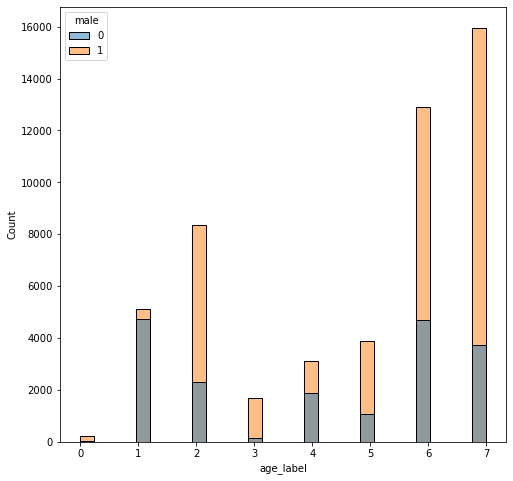

In [29]:
plt.figure(figsize=(8,8))
sns.histplot(x='age_label',data=df_features,hue='male')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

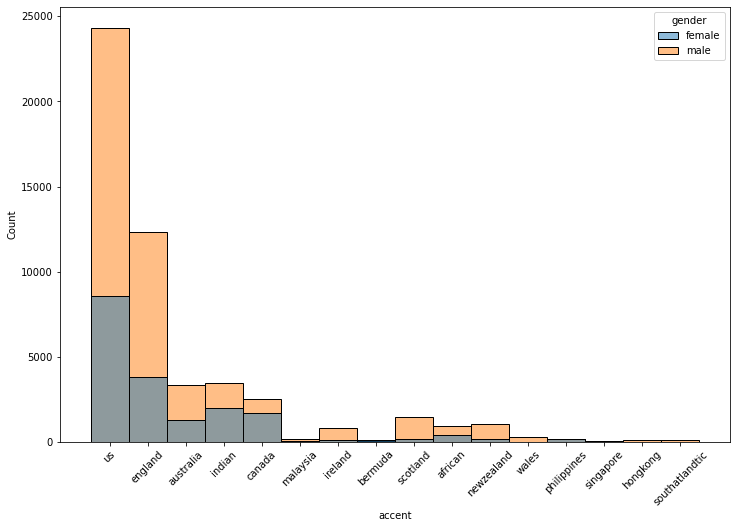

In [14]:
plt.figure(figsize=(12,8))
ax = sns.histplot(x='accent',data=df_features,hue='gender')
plt.xticks(rotation=45)

In [15]:
### dropping the accent column because of the imbalanced dataset
df_features = df_features.drop('accent',axis=1)

Label 0: female || 1: male

In [16]:
### hot encoding the gender attribute
gender = pd.get_dummies(df_features['gender'],drop_first=True)
df_features = df_features.drop('gender',axis=1)
df_features = pd.concat([df_features,gender],axis=1)

Label 7: twenties ||
6: thirties ||
2: fourties ||
1: fifties ||
4: sixties ||
5: teens ||
3: seventies ||
0: eighties 

In [17]:
from sklearn.preprocessing import LabelEncoder

In [22]:
### label encoding the age attribute
encoding = LabelEncoder()
encoding.fit(df_features['age'])
age = encoding.transform(df_features['age'])
age = pd.DataFrame(age,columns=['age_label'])
df_features = pd.concat([df_features,age],axis=1)

In [24]:
### hot encoding the age attribute
age = pd.get_dummies(df_features['age'],drop_first=True)
df_features = df_features.drop('age',axis=1)
df_features = pd.concat([df_features,age],axis=1)

In [25]:
df_features.to_csv('features_data.csv',index=False)

In [74]:
df_features = pd.read_csv('features_data.csv')

In [75]:
df_features.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_30,male,age_label,fifties,fourties,seventies,sixties,teens,thirties,twenties
0,-583.10974,100.370450,0.943255,48.706882,-10.540771,0.412921,-18.057110,-8.326262,-1.521946,-12.522870,...,-2.170289,0,7,0,0,0,0,0,0,1
1,-394.04380,99.290730,-38.356846,36.202087,13.018513,-0.332277,-30.521050,-24.611736,-20.024382,-8.018195,...,-1.527913,1,3,0,0,1,0,0,0,0
2,-329.92706,89.804886,-93.255320,53.524906,-14.073632,-17.782843,-30.973644,-11.115298,1.704327,-15.689195,...,-1.986013,0,6,0,0,0,0,0,1,0
3,-544.49830,80.187970,11.456089,26.149498,8.867408,4.068777,-5.959950,-0.991863,-5.118737,-1.111087,...,2.014324,1,4,0,0,0,1,0,0,0
4,-265.77216,105.103935,9.275387,27.494017,1.308293,28.853981,-11.553512,19.866306,-9.072405,16.467325,...,-0.406267,1,1,1,0,0,0,0,0,0


#### Train Test Split

In [76]:
df_features = df_features.drop(['fifties','fourties','seventies','sixties','teens','thirties','twenties'], axis = 1)

In [77]:
df_features.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,male,age_label
0,-583.10974,100.370450,0.943255,48.706882,-10.540771,0.412921,-18.057110,-8.326262,-1.521946,-12.522870,...,-10.564928,-2.081630,-4.345325,-5.543271,0.867665,-2.325722,-4.993744,-2.170289,0,7
1,-394.04380,99.290730,-38.356846,36.202087,13.018513,-0.332277,-30.521050,-24.611736,-20.024382,-8.018195,...,-1.825251,-5.490204,-5.979488,-5.525754,-3.199488,-12.229231,2.510893,-1.527913,1,3
2,-329.92706,89.804886,-93.255320,53.524906,-14.073632,-17.782843,-30.973644,-11.115298,1.704327,-15.689195,...,-2.550232,-2.942057,-3.899509,5.903738,-2.495930,4.284184,2.987215,-1.986013,0,6
3,-544.49830,80.187970,11.456089,26.149498,8.867408,4.068777,-5.959950,-0.991863,-5.118737,-1.111087,...,-4.689697,-3.014753,-1.035969,-4.900939,-1.521831,-3.017688,-1.510514,2.014324,1,4
4,-265.77216,105.103935,9.275387,27.494017,1.308293,28.853981,-11.553512,19.866306,-9.072405,16.467325,...,-0.586617,1.660018,-2.550889,1.886928,-5.248073,1.555064,-0.886034,-0.406267,1,1


In [78]:
X = df_features.drop(['male','age_label'],axis=1)
y = df_features[['male','age_label']]

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(62914, 30)
(6991, 30)
(62914, 2)
(6991, 2)


In [82]:
col_name = list(X_train.columns)

#### Feature Normalization

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [39]:
X_train = pd.DataFrame(X_train,columns=col_name)
X_test = pd.DataFrame(X_test,columns=col_name)

In [40]:
y_train = y_train.reset_index()
y_train = y_train.drop('index',axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop('index',axis=1)

In [41]:
X_train.to_csv('X_train.csv',index=False)
X_test.to_csv('X_test.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
y_test.to_csv('y_test.csv',index=False)

### Gender Classification

In [2]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [49]:
X_train.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,0.564395,0.353829,-0.278928,0.244259,-0.181786,-0.359068,-0.434922,0.421213,-2.619306,-0.233284,...,-0.752095,-0.047534,-1.596541,-2.185107,-0.475254,-2.322643,-0.664499,-1.974565,-0.852845,0.497673
1,-1.267875,-2.791355,-0.087076,1.215719,-0.609884,-0.713474,-0.228118,-1.044130,0.946386,-0.418563,...,1.012054,1.152340,0.962649,1.060207,1.568758,1.971719,1.215556,2.248357,0.764481,0.759086
2,1.255162,-0.192609,0.540949,-1.715435,0.274440,2.556369,-1.519288,0.040003,-0.116192,0.200872,...,0.452080,-0.511977,0.175765,-0.709609,-1.761413,-0.222903,-0.364405,-1.224240,0.260271,-0.052288
3,-1.142260,-0.058441,0.073180,0.767581,-0.707162,0.221958,-0.094128,0.026847,-0.713516,0.806025,...,-1.707473,0.421067,0.210689,0.256840,-0.117659,-0.285450,-1.195636,-0.097772,-0.528391,-0.231970
4,-0.242462,-0.681530,-0.062332,-0.463858,-1.458397,0.806520,-0.685224,0.200540,-0.058170,0.478191,...,0.820614,0.000589,-0.148946,0.207631,0.275857,-0.189223,-0.384763,-0.225240,0.261362,-0.031957


In [50]:
y_gender_train = y_train['male']
y_gender_test = y_test['male']

##### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression()
model.fit(X_train,y_gender_train)
pred = model.predict(X_test)

In [47]:
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix

In [48]:
print(f1_score(pred,y_gender_test))
print()
print(accuracy_score(pred,y_gender_test))
print()
print(confusion_matrix(pred,y_gender_test))
print()
print(classification_report(pred,y_gender_test))

0.8915752278222058

0.8332141324560148

[[1031  317]
 [ 849 4794]]

              precision    recall  f1-score   support

           0       0.55      0.76      0.64      1348
           1       0.94      0.85      0.89      5643

    accuracy                           0.83      6991
   macro avg       0.74      0.81      0.77      6991
weighted avg       0.86      0.83      0.84      6991



##### KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
model = KNeighborsClassifier()
model.fit(X_train,y_gender_train)
pred = model.predict(X_test)

In [6]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

In [55]:
print(f1_score(pred,y_gender_test))
print()
print(accuracy_score(pred,y_gender_test))
print()
print(confusion_matrix(pred,y_gender_test))
print()
print(classification_report(pred,y_gender_test))

0.9548720896809427

0.9326276641396081

[[1537  128]
 [ 343 4983]]

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1665
           1       0.97      0.94      0.95      5326

    accuracy                           0.93      6991
   macro avg       0.90      0.93      0.91      6991
weighted avg       0.94      0.93      0.93      6991



In [57]:
joblib.dump(model,'KNN_gender_detection.pkl')

['KNN_gender_detection.pkl']

##### SVM

In [52]:
from sklearn.svm import SVC

In [ ]:
model = SVC(C=100)
model.fit(X_train,y_gender_train)
pred = model.predict(X_test)

In [8]:
print(f1_score(pred,y_gender_test))
print()
print(accuracy_score(pred,y_gender_test))
print()
print(confusion_matrix(pred,y_gender_test))
print()
print(classification_report(pred,y_gender_test))

0.9528063701689649

0.9304820483478758

[[1599  205]
 [ 281 4906]]

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1804
           1       0.96      0.95      0.95      5187

    accuracy                           0.93      6991
   macro avg       0.91      0.92      0.91      6991
weighted avg       0.93      0.93      0.93      6991



##### Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
model = DecisionTreeClassifier()
model.fit(X_train,y_gender_train)
pred = model.predict(X_test)

In [11]:
print(f1_score(pred,y_gender_test))
print()
print(accuracy_score(pred,y_gender_test))
print()
print(confusion_matrix(pred,y_gender_test))
print()
print(classification_report(pred,y_gender_test))

0.8603625673689368

0.7961664997854384

[[1176  721]
 [ 704 4390]]

              precision    recall  f1-score   support

           0       0.63      0.62      0.62      1897
           1       0.86      0.86      0.86      5094

    accuracy                           0.80      6991
   macro avg       0.74      0.74      0.74      6991
weighted avg       0.80      0.80      0.80      6991



##### Bagging Decision Tree

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
model = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
model.fit(X_train, y_gender_train)
pred = model.predict(X_test)

In [197]:
print(f1_score(pred,y_gender_test))
print()
print(accuracy_score(pred,y_gender_test))
print()
print(confusion_matrix(pred,y_gender_test))
print()
print(classification_report(pred,y_gender_test))

0.9014679075122326

0.8530968387927336

[[1266  413]
 [ 614 4698]]

              precision    recall  f1-score   support

           0       0.67      0.75      0.71      1679
           1       0.92      0.88      0.90      5312

    accuracy                           0.85      6991
   macro avg       0.80      0.82      0.81      6991
weighted avg       0.86      0.85      0.86      6991



##### Boosting Decision Tree

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [16]:
model = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
model.fit(X_train, y_gender_train)
pred = model.predict(X_test)

In [17]:
print(f1_score(pred,y_gender_test))
print()
print(accuracy_score(pred,y_gender_test))
print()
print(confusion_matrix(pred,y_gender_test))
print()
print(classification_report(pred,y_gender_test))

0.89351376574895

0.8367901587755686

[[1063  324]
 [ 817 4787]]

              precision    recall  f1-score   support

           0       0.57      0.77      0.65      1387
           1       0.94      0.85      0.89      5604

    accuracy                           0.84      6991
   macro avg       0.75      0.81      0.77      6991
weighted avg       0.86      0.84      0.85      6991



##### Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
model = RandomForestClassifier()
model.fit(X_train,y_gender_train)
pred = model.predict(X_test)

In [203]:
print(f1_score(pred,y_gender_test))
print()
print(accuracy_score(pred,y_gender_test))
print()
print(confusion_matrix(pred,y_gender_test))
print()
print(classification_report(pred,y_gender_test))

0.9218778994247543

0.8795594335574309

[[1181  143]
 [ 699 4968]]

              precision    recall  f1-score   support

           0       0.63      0.89      0.74      1324
           1       0.97      0.88      0.92      5667

    accuracy                           0.88      6991
   macro avg       0.80      0.88      0.83      6991
weighted avg       0.91      0.88      0.89      6991



##### Neural Network 

In [5]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [118]:
# CODE HERE
model = Sequential()

model.add(Dense(30,activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(16,activation='relu',kernel_regularizer = regularizers.l2(0.01)))
#model.add(Dropout(0.2))
#model.add(Dense(7,activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(18,activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(9,activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(4,activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(2,activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [119]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [120]:
model.fit(X_train,y_gender_train,epochs=90,batch_size=256,validation_data=(X_test,y_gender_test))

Epoch 1/90
246/246 [==============================] - 3s 6ms/step - loss: 0.4370 - accuracy: 0.8056 - val_loss: 0.3802 - val_accuracy: 0.8431
Epoch 2/90
246/246 [==============================] - 1s 5ms/step - loss: 0.3585 - accuracy: 0.8514 - val_loss: 0.3550 - val_accuracy: 0.8517
Epoch 3/90
246/246 [==============================] - 1s 5ms/step - loss: 0.3408 - accuracy: 0.8582 - val_loss: 0.3432 - val_accuracy: 0.8582
Epoch 4/90
246/246 [==============================] - 1s 5ms/step - loss: 0.3298 - accuracy: 0.8633 - val_loss: 0.3345 - val_accuracy: 0.8600
Epoch 5/90
246/246 [==============================] - 1s 5ms/step - loss: 0.3218 - accuracy: 0.8672 - val_loss: 0.3273 - val_accuracy: 0.8640
Epoch 6/90
246/246 [==============================] - 1s 5ms/step - loss: 0.3159 - accuracy: 0.8699 - val_loss: 0.3221 - val_accuracy: 0.8667
Epoch 7/90
246/246 [==============================] - 1s 5ms/step - loss: 0.3111 - accuracy: 0.8722 - val_loss: 0.3189 - val_accuracy: 0.8654
Epoch 

In [121]:
print(model.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 30)                930       
                                                                 
 dense_36 (Dense)            (None, 1)                 31        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________
None


<AxesSubplot:>

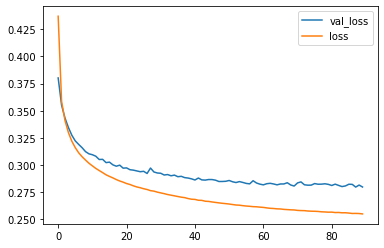

In [122]:
# CODE HERE
losses = pd.DataFrame(model.history.history)
losses[['val_loss','loss']].plot()

In [123]:
pred = (model.predict(X_test) > 0.5).astype("int32")

219/219 [==============================] - 1s 3ms/step


In [124]:
print(f1_score(pred,y_gender_test))
print()
print(accuracy_score(pred,y_gender_test))
print()
print(confusion_matrix(pred,y_gender_test))
print()
print(classification_report(pred,y_gender_test))

0.9228705566733736

0.8848519525103705

[[1370  295]
 [ 510 4816]]

              precision    recall  f1-score   support

           0       0.73      0.82      0.77      1665
           1       0.94      0.90      0.92      5326

    accuracy                           0.88      6991
   macro avg       0.84      0.86      0.85      6991
weighted avg       0.89      0.88      0.89      6991



### Age Category Classification

In [3]:
y_age_train = y_train['age_label']
y_age_test = y_test['age_label']

##### Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
model = LogisticRegression(max_iter=10000000000000)
model.fit(X_train,y_age_train)
pred = model.predict(X_test)

In [105]:
print(f1_score(pred,y_age_test,average='weighted'))
print()
print(accuracy_score(pred,y_age_test))
print()
print(confusion_matrix(pred,y_age_test))
print()
print(classification_report(pred,y_age_test))

0.37658227933088945

0.32770705192390215

[[   0    1    1    0    0    0    0    1]
 [   1   87   60    5   48   21   43   70]
 [   1   73  134   14   22   24  134   96]
 [   0    1    0    3    0    2    0    2]
 [   0   14   15    2   25    4   12   12]
 [   0    5    7    0    0   28    9    4]
 [   8  386  319   76  194  121  805  566]
 [  17  429  517   83  198  295  787 1209]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.09      0.26      0.13       335
           2       0.13      0.27      0.17       498
           3       0.02      0.38      0.03         8
           4       0.05      0.30      0.09        84
           5       0.06      0.53      0.10        53
           6       0.45      0.33      0.38      2475
           7       0.62      0.34      0.44      3535

    accuracy                           0.33      6991
   macro avg       0.18      0.30      0.17      6991
weighted avg    

##### KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
model = KNeighborsClassifier()
model.fit(X_train,y_age_train)
pred = model.predict(X_test)

In [108]:
print(f1_score(pred,y_age_test,average='weighted'))
print()
print(accuracy_score(pred,y_age_test))
print()
print(confusion_matrix(pred,y_age_test))
print()
print(classification_report(pred,y_age_test))

0.7962944851183236

0.795737376627092

[[  18    2    0    0    2    1    3    5]
 [   0  852   41    7   18   33   79   94]
 [   2   19  861    3   10   24   77   96]
 [   0    1    3  154    4    4   14   10]
 [   0   15   21    2  413   12   29   43]
 [   0    5    2    1    2  325   21   21]
 [   6   60   64    8   28   48 1478  229]
 [   1   42   61    8   10   48   89 1462]]

              precision    recall  f1-score   support

           0       0.67      0.58      0.62        31
           1       0.86      0.76      0.80      1124
           2       0.82      0.79      0.80      1092
           3       0.84      0.81      0.83       190
           4       0.85      0.77      0.81       535
           5       0.66      0.86      0.75       377
           6       0.83      0.77      0.80      1921
           7       0.75      0.85      0.79      1721

    accuracy                           0.80      6991
   macro avg       0.78      0.77      0.77      6991
weighted avg       

In [110]:
joblib.dump(model, 'KNN_age_model.pkl')

['KNN_age_model.pkl']

##### SVM

In [111]:
from sklearn.svm import SVC

In [ ]:
model = SVC(C=1)
model.fit(X_train,y_age_train)
pred = model.predict(X_test)

In [152]:
print(f1_score(pred,y_age_test,average='weighted'))
print()
print(accuracy_score(pred,y_age_test))
print()
print(confusion_matrix(pred,y_age_test))
print()
print(classification_report(pred,y_age_test))

0.7614100194796487

0.7608353597482478

[[  20    0    1    0    1    0    1    2]
 [   1  798   25    6   16   18   68   92]
 [   1   22  790    5   12   32   55   95]
 [   0    1    2  135    1    1    6    9]
 [   0    3   11    1  373    5   20   26]
 [   0    8   10    1    8  289   22   32]
 [   4   79   98   11   37   62 1413  203]
 [   1   85  116   24   39   88  205 1501]]

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        25
           1       0.80      0.78      0.79      1024
           2       0.75      0.78      0.77      1012
           3       0.74      0.87      0.80       155
           4       0.77      0.85      0.81       439
           5       0.58      0.78      0.67       370
           6       0.79      0.74      0.76      1907
           7       0.77      0.73      0.75      2059

    accuracy                           0.76      6991
   macro avg       0.74      0.79      0.76      6991
weighted avg      

##### Decision Tree

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
model = DecisionTreeClassifier()
model.fit(X_train,y_age_train)
pred = model.predict(X_test)

In [8]:
print(f1_score(pred,y_age_test,average='weighted'))
print()
print(accuracy_score(pred,y_age_test))
print()
print(confusion_matrix(pred,y_age_test))
print()
print(classification_report(pred,y_age_test))

0.40225615103109547

0.40208839937061935

[[  6   0   1   1   0   1   4   7]
 [  3 409  95  28  48  40 204 195]
 [  4 107 399  23  52  61 175 216]
 [  0  20  15  37   4   6  50  42]
 [  2  46  59  11 201  19  85 104]
 [  4  50  49  11  22 126 106 126]
 [  4 175 204  37  83  96 758 395]
 [  4 189 231  35  77 146 408 875]]

              precision    recall  f1-score   support

           0       0.22      0.30      0.26        20
           1       0.41      0.40      0.41      1022
           2       0.38      0.38      0.38      1037
           3       0.20      0.21      0.21       174
           4       0.41      0.38      0.40       527
           5       0.25      0.26      0.25       494
           6       0.42      0.43      0.43      1752
           7       0.45      0.45      0.45      1965

    accuracy                           0.40      6991
   macro avg       0.34      0.35      0.35      6991
weighted avg       0.40      0.40      0.40      6991



##### Bagging Decision Tree

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [10]:
model = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
model.fit(X_train, y_age_train)
pred = model.predict(X_test)

In [11]:
print(f1_score(pred,y_age_test,average='weighted'))
print()
print(accuracy_score(pred,y_age_test))
print()
print(confusion_matrix(pred,y_age_test))
print()
print(classification_report(pred,y_age_test))

0.5177393450250413

0.512516092118438

[[   3    0    0    0    0    0    0    0]
 [   0  553   77   19   48   52  157  169]
 [   6   87  525   23   43   54  180  179]
 [   0    0    6   57    1    1    4    3]
 [   1   15   16    3  197    9   22   30]
 [   2   13   12    2    6  122   29   39]
 [   7  164  196   41   97  114 1023  437]
 [   8  164  221   38   95  143  375 1103]]

              precision    recall  f1-score   support

           0       0.11      1.00      0.20         3
           1       0.56      0.51      0.53      1075
           2       0.50      0.48      0.49      1097
           3       0.31      0.79      0.45        72
           4       0.40      0.67      0.51       293
           5       0.25      0.54      0.34       225
           6       0.57      0.49      0.53      2079
           7       0.56      0.51      0.54      2147

    accuracy                           0.51      6991
   macro avg       0.41      0.63      0.45      6991
weighted avg       

##### Boosting Decision Tree

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [13]:
model = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
model.fit(X_train, y_age_train)
pred = model.predict(X_test)

In [14]:
print(f1_score(pred,y_age_test,average='weighted'))
print()
print(accuracy_score(pred,y_age_test))
print()
print(confusion_matrix(pred,y_age_test))
print()
print(classification_report(pred,y_age_test))

0.395014876392853

0.3428694035188099

[[   2    0    0    0    0    0    0    0]
 [   1  131   41    2   26    8   43   43]
 [   1   40  125    7   13   20   70   69]
 [   0    0    2    2    0    1    0    1]
 [   0    5    2    3   28    1    5    8]
 [   0    6    7    0    1   19    6    9]
 [   8  324  310   94  161  130  763  503]
 [  15  490  566   75  258  316  903 1327]]

              precision    recall  f1-score   support

           0       0.07      1.00      0.14         2
           1       0.13      0.44      0.20       295
           2       0.12      0.36      0.18       345
           3       0.01      0.33      0.02         6
           4       0.06      0.54      0.10        52
           5       0.04      0.40      0.07        48
           6       0.43      0.33      0.37      2293
           7       0.68      0.34      0.45      3950

    accuracy                           0.34      6991
   macro avg       0.19      0.47      0.19      6991
weighted avg       

##### Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
model = RandomForestClassifier()
model.fit(X_train,y_age_train)
pred = model.predict(X_test)

In [17]:
print(f1_score(pred,y_age_test,average='weighted'))
print()
print(accuracy_score(pred,y_age_test))
print()
print(confusion_matrix(pred,y_age_test))
print()
print(classification_report(pred,y_age_test))

0.6567027435146164

0.6501215848948648

[[   6    0    0    0    0    0    0    1]
 [   0  602   16    2   15   16   22   30]
 [   1   20  587    8   10   11   39   50]
 [   0    0    0   71    0    0    0    0]
 [   0    1    4    1  251    0    0    3]
 [   0    1    1    0    0  123    0    2]
 [  12  155  181   48  106  110 1343  312]
 [   8  217  264   53  105  235  386 1562]]

              precision    recall  f1-score   support

           0       0.22      0.86      0.35         7
           1       0.60      0.86      0.71       703
           2       0.56      0.81      0.66       726
           3       0.39      1.00      0.56        71
           4       0.52      0.97      0.67       260
           5       0.25      0.97      0.40       127
           6       0.75      0.59      0.66      2267
           7       0.80      0.55      0.65      2830

    accuracy                           0.65      6991
   macro avg       0.51      0.83      0.58      6991
weighted avg      

##### XG Boost

In [4]:
import xgboost as xgb

In [5]:
model = xgb.XGBClassifier()
model.fit(X_train, y_age_train)
pred = model.predict(X_test)

In [7]:
print(f1_score(pred,y_age_test,average='weighted'))
print()
print(accuracy_score(pred,y_age_test))
print()
print(confusion_matrix(pred,y_age_test))
print()
print(classification_report(pred,y_age_test))

0.5942879832278003

0.5903304248319268

[[  10    0    0    0    0    0    0    1]
 [   1  590   46   10   23   15   69   75]
 [   4   44  511    6   21   24   88  109]
 [   0    1    3   89    2    0    4    7]
 [   0   12   17    2  242    4   15   14]
 [   0    7   12    1    2  148   16   25]
 [   5  149  198   44  115  107 1149  341]
 [   7  193  266   31   82  197  449 1388]]

              precision    recall  f1-score   support

           0       0.37      0.91      0.53        11
           1       0.59      0.71      0.65       829
           2       0.49      0.63      0.55       807
           3       0.49      0.84      0.62       106
           4       0.50      0.79      0.61       306
           5       0.30      0.70      0.42       211
           6       0.64      0.55      0.59      2108
           7       0.71      0.53      0.61      2613

    accuracy                           0.59      6991
   macro avg       0.51      0.71      0.57      6991
weighted avg      

#### Neural Network

##### Deep Learning

In [5]:
y_age_train = y_train.drop(['male','age_label'],axis=1)
y_age_test = y_test.drop(['male','age_label'],axis=1)

In [4]:
from keras import layers, models, optimizers, losses, metrics
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [138]:
# CODE HERE
model = Sequential()

model.add(InputLayer(input_shape=30))
model.add(Dense(200,activation='tanh'))
#model.add(Dropout(0.2))
model.add(Dense(150,activation='tanh'))
#model.add(Dropout(0.2))
model.add(Dense(112,activation='tanh'))
#model.add(Dropout(0.2))
model.add(Dense(84,activation='tanh'))
#model.add(Dropout(0.2))
model.add(Dense(63,activation='tanh'))
#model.add(Dropout(0.2))
model.add(Dense(48,activation='tanh'))
#model.add(Dropout(0.2))
model.add(Dense(36,activation='tanh'))
#model.add(Dropout(0.2))
model.add(Dense(27,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(21,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(15,activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(2,activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(7,activation='softmax'))

In [139]:
earlystop = EarlyStopping(monitor='val_loss',patience=3)

In [140]:
losses = {'output_1':'binary_crossentropy'}

In [141]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [142]:
model.fit(X_train,y_age_train,epochs=190,batch_size=256,validation_data=(X_test,y_age_test),callbacks=earlystop)

Epoch 1/190
246/246 [==============================] - 2s 5ms/step - loss: 0.4140 - accuracy: 0.2937 - val_loss: 0.3690 - val_accuracy: 0.3084
Epoch 2/190
246/246 [==============================] - 1s 6ms/step - loss: 0.3592 - accuracy: 0.3581 - val_loss: 0.3444 - val_accuracy: 0.4048
Epoch 3/190
246/246 [==============================] - 1s 4ms/step - loss: 0.3289 - accuracy: 0.4509 - val_loss: 0.3136 - val_accuracy: 0.4765
Epoch 4/190
246/246 [==============================] - 1s 5ms/step - loss: 0.2974 - accuracy: 0.5149 - val_loss: 0.2925 - val_accuracy: 0.5207
Epoch 5/190
246/246 [==============================] - 1s 5ms/step - loss: 0.2715 - accuracy: 0.5697 - val_loss: 0.2727 - val_accuracy: 0.5726
Epoch 6/190
246/246 [==============================] - 1s 5ms/step - loss: 0.2508 - accuracy: 0.6116 - val_loss: 0.2630 - val_accuracy: 0.5870
Epoch 7/190
246/246 [==============================] - 1s 4ms/step - loss: 0.2356 - accuracy: 0.6410 - val_loss: 0.2547 - val_accuracy: 0.6068

In [143]:
print(model.summary())

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_251 (Dense)           (None, 200)               6200      
                                                                 
 dense_252 (Dense)           (None, 150)               30150     
                                                                 
 dense_253 (Dense)           (None, 112)               16912     
                                                                 
 dense_254 (Dense)           (None, 84)                9492      
                                                                 
 dense_255 (Dense)           (None, 63)                5355      
                                                                 
 dense_256 (Dense)           (None, 48)                3072      
                                                                 
 dense_257 (Dense)           (None, 36)              

<AxesSubplot:>

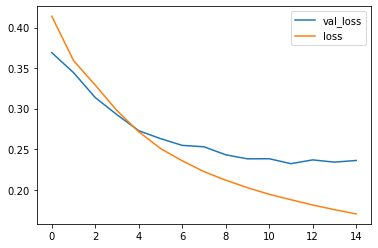

In [144]:
# CODE HERE
losses = pd.DataFrame(model.history.history)
losses[['val_loss','loss']].plot()

In [145]:
pred = (model.predict(X_test) > 0.5).astype("int32")

219/219 [==============================] - 1s 3ms/step


In [146]:
print(f1_score(pred,y_age_test,average='weighted'))
print()
print(accuracy_score(pred,y_age_test))
print()
#print(confusion_matrix(pred,y_age_test))
print()
print(classification_report(pred,y_age_test))

0.6595140112999031

0.6076383922185667


              precision    recall  f1-score   support

           0       0.65      0.79      0.71       821
           1       0.58      0.75      0.66       810
           2       0.47      0.80      0.59       107
           3       0.62      0.75      0.68       403
           4       0.35      0.73      0.48       237
           5       0.60      0.71      0.65      1514
           6       0.69      0.65      0.67      2075

   micro avg       0.61      0.71      0.66      5967
   macro avg       0.57      0.74      0.63      5967
weighted avg       0.62      0.71      0.66      5967
 samples avg       0.61      0.61      0.61      5967



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Real Time Model Testing

In [11]:
import joblib

In [12]:
## Voice Data Feature Extraction

### extract the features from the audio files using mfcc
def feature_extracter(fileName):
    audio,sample_rate = librosa.load(fileName,res_type='kaiser_fast')
    mfcc_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=30)
    mfccs_scaled_features = np.mean(mfcc_features.T, axis=0)
    
    return list(mfccs_scaled_features)

In [37]:
fileName = 'C:\\Users\\Dell\\Downloads\\narendra-modi-walking-out-of-karan-thapar-interview-tuberippercom_R89R3fPq.wav'
col_name = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5','Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10','Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15','Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20','Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25','Feature_26', 'Feature_27', 'Feature_28', 'Feature_29', 'Feature_30']

In [38]:
observation = [feature_extracter(fileName)]
observation = pd.DataFrame(observation, columns = col_name)

In [39]:
## scaling the observation
scaler = joblib.load('scaler.pkl')
scaled_observation = scaler.transform(observation)
scaled_observation = pd.DataFrame(scaled_observation, columns = col_name)

In [40]:
### Gender classification model
gender_model = joblib.load('KNN_gender_detection.pkl')
gender_predict = gender_model.predict(scaled_observation)
## considering the labels 1 = male 0 = female
if gender_predict[0] == 1:
    print('Male')
else:
    print('Female')

Male


In [41]:
def age_reverse_labelling(label):
    if label == 0:
        return 'Eighties'
    if label == 1:
        return 'Fifties'
    if label == 2:
        return 'Fourties'
    if label == 3:
        return 'Seventies'
    if label == 4:
        return 'Sixties'
    if label == 5:
        return 'Teens'
    if label == 6:
        return 'Thirties'
    if label == 7:
        return 'Twenties'
    else:
        return 'Cannot be predicted'

In [42]:
### Age classification model
age_model = joblib.load('KNN_age_model.pkl')
age_predict = age_model.predict(scaled_observation)
## considering the labels 1 = male 0 = female
print(age_reverse_labelling(age_predict[0]))

Twenties
